## Import Libraries

In [1]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.feature_selection import SequentialFeatureSelector
from scipy import stats
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor

import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

## Problem statement

In [2]:
# To predict salesprice for each house

## Read the data

In [3]:
train_df = pd.read_csv("training_set.csv")
train_df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,Gas

### Drop unnecessary columns(Columns with no statitical importance)

In [4]:
train_df.drop(["Id"],axis=1,inplace = True)
train_df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,GasA,Gd,Y,FuseA,1078,0,0,1078,1,0,1,0,2,

In [5]:
train_df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [6]:
train_df.shape

(1460, 80)

In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

## Missing Data treatment

In [8]:
train_df.isna().sum().sort_values(ascending=False)

PoolQC           1453
MiscFeature      1406
Alley            1369
Fence            1179
FireplaceQu       690
LotFrontage       259
GarageYrBlt        81
GarageCond         81
GarageType         81
GarageFinish       81
GarageQual         81
BsmtExposure       38
BsmtFinType2       38
BsmtCond           37
BsmtQual           37
BsmtFinType1       37
MasVnrArea          8
MasVnrType          8
Electrical          1
MSSubClass          0
Fireplaces          0
Functional          0
KitchenQual         0
KitchenAbvGr        0
BedroomAbvGr        0
HalfBath            0
FullBath            0
BsmtHalfBath        0
TotRmsAbvGrd        0
GarageCars          0
GrLivArea           0
GarageArea          0
PavedDrive          0
WoodDeckSF          0
OpenPorchSF         0
EnclosedPorch       0
3SsnPorch           0
ScreenPorch         0
PoolArea            0
MiscVal             0
MoSold              0
YrSold              0
SaleType            0
SaleCondition       0
BsmtFullBath        0
CentralAir

In [9]:
train_df['PoolQC'].fillna('No Pool',inplace=True)
train_df['MiscFeature'].fillna('None',inplace=True)
train_df['Alley'].fillna('No alley access',inplace=True)
train_df['Fence'].fillna('No Fence',inplace=True)
train_df['FireplaceQu'].fillna('No Fireplace',inplace=True)
train_df['GarageCond'].fillna('No Garage',inplace=True)
train_df['GarageType'].fillna('No Garage',inplace=True)
train_df['GarageFinish'].fillna('No Garage',inplace=True)
train_df['GarageQual'].fillna('No Garage',inplace=True)
train_df['BsmtExposure'].fillna('No Basement',inplace=True)
train_df['BsmtFinType2'].fillna('No Basement',inplace=True)
train_df['BsmtCond'].fillna('No Basement',inplace=True)
train_df['BsmtQual'].fillna('No Basement',inplace=True)
train_df['BsmtFinType1'].fillna('No Basement',inplace=True)
train_df['MasVnrType'].fillna('None',inplace=True)
train_df['GarageYrBlt'].fillna(train_df['GarageYrBlt'].median(),inplace=True)
train_df['MasVnrArea'].fillna(train_df['MasVnrArea'].mean(),inplace=True)
train_df['LotFrontage'].fillna(train_df['LotFrontage'].mean(),inplace=True)
train_df['Electrical'].fillna(train_df['Electrical'].mode()[0],inplace=True)

In [10]:
train_df.isna().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
Alley            0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual 

In [11]:
cat = []
con = []
for i in train_df.columns:
    if(train_df[i].dtypes == "object"):
        cat.append(i)
    else:
        con.append(i)

In [12]:
cat

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [13]:
con

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

In [14]:
train_cat = train_df[cat]
train_cat

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,No alley access,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,No Fireplace,Attchd,RFn,TA,TA,Y,No Pool,No Fence,None,WD,Normal
1,RL,Pave,No alley access,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,No Pool,No Fence,None,WD,Normal
2,RL,Pave,No alley access,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,No Pool,No Fence,None,WD,Normal
3,RL,Pave,No alley access,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,No Pool,No Fence,None,WD,Abnorml
4,RL,Pave,No alley access,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,No Pool,No Fence,None,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Pave,No alley access,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,Gd,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,No Pool,No Fence,None,WD,Normal
1456,RL,Pave,No alley access,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,Plywood,Plywood,Stone,TA,TA,CBlock,Gd,TA,No,ALQ,Rec,GasA,TA,Y,SBrkr,TA,Min1,TA,Attchd,Unf,TA,TA,Y,No Pool,MnPrv,None,WD,Normal
1457,RL,Pave,No alley access,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,CemntBd,CmentBd,None,Ex,Gd,Stone,TA,Gd,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Gd,Attchd,RFn,TA,TA,Y,No Pool,GdPrv,Shed,WD,Normal
1458,RL,Pave,No alley access,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Hip,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,TA,TA,Mn,GLQ,Rec,GasA,Gd,Y,FuseA,Gd,Typ,No Fireplace,Attchd,Unf,TA,TA,Y,No Pool,No Fence,None,WD,Normal


In [15]:
train_con = train_df[con]
train_con

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,62.0,7917,6,5,1999,2000,0.0,0,0,953,953,953,694,0,1647,0,0,2,1,3,1,7,1,1999.0,2,460,0,40,0,0,0,0,0,8,2007,175000
1456,20,85.0,13175,6,6,1978,1988,119.0,790,163,589,1542,2073,0,0,2073,1,0,2,0,3,1,7,2,1978.0,2,500,349,0,0,0,0,0,0,2,2010,210000
1457,70,66.0,9042,7,9,1941,2006,0.0,275,0,877,1152,1188,1152,0,2340,0,0,2,0,4,1,9,2,1941.0,1,252,0,60,0,0,0,0,2500,5,2010,266500
1458,20,68.0,9717,5,6,1950,1996,0.0,49,1029,0,1078,1078,0,0,1078,1,0,1,0,2,1,5,0,1950.0,1,240,366,0,112,0,0,0,0,4,2010,142125


In [16]:
train_con.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [17]:
train_con.shape

(1460, 37)

## Outliers

In [18]:
#we check and handle outliers in continuous features only

<AxesSubplot:>

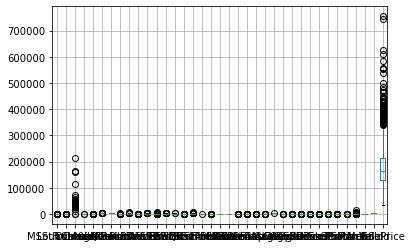

In [19]:
train_con.boxplot()

In [20]:
outlier=['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice']

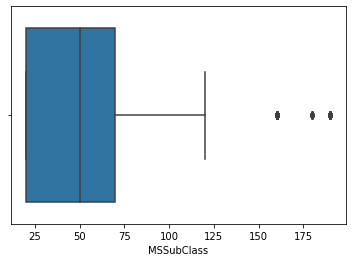

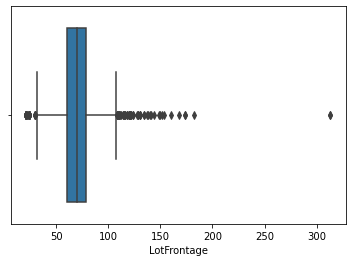

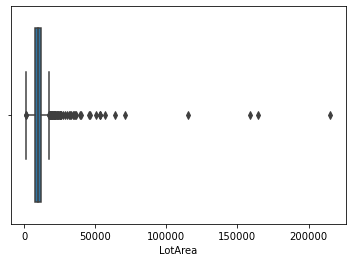

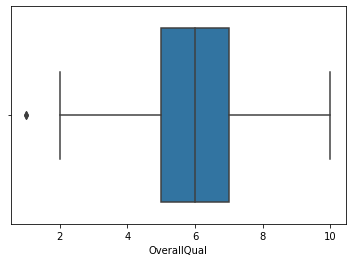

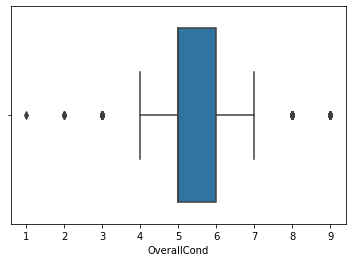

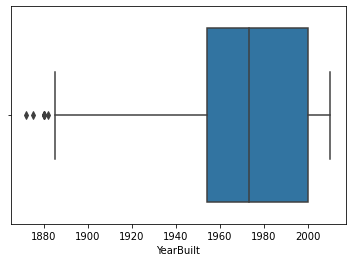

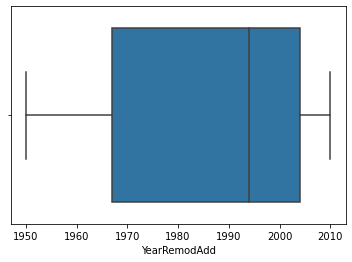

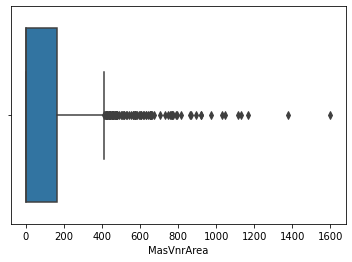

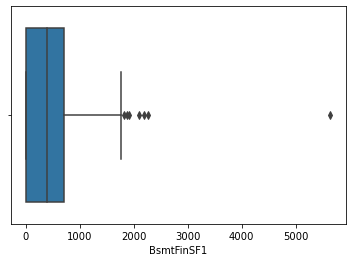

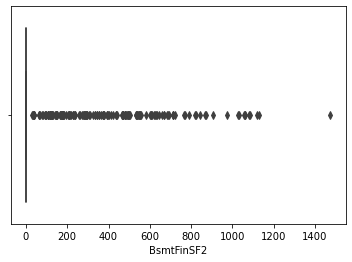

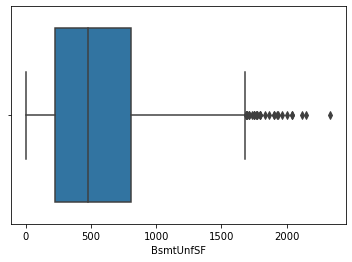

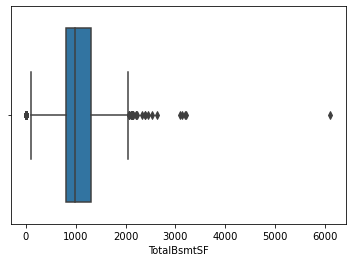

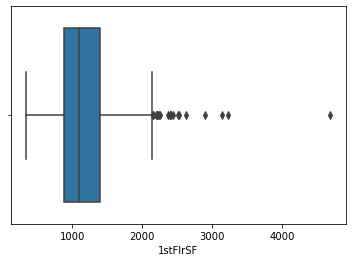

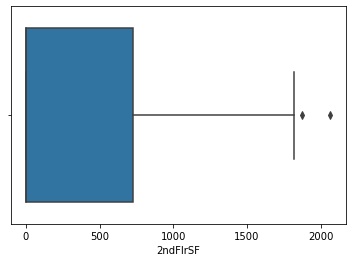

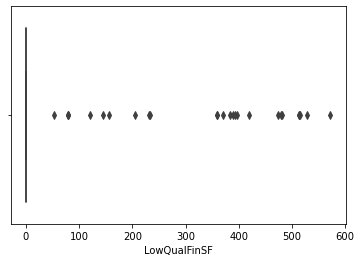

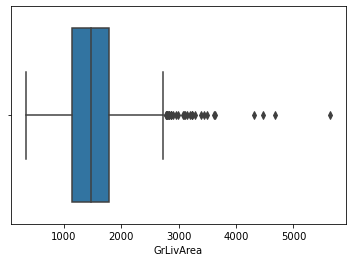

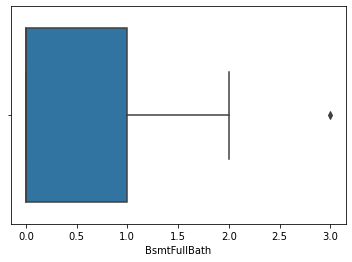

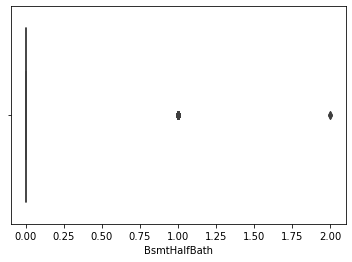

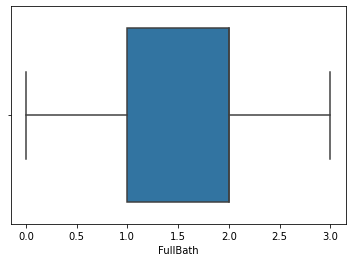

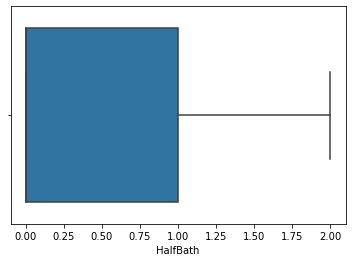

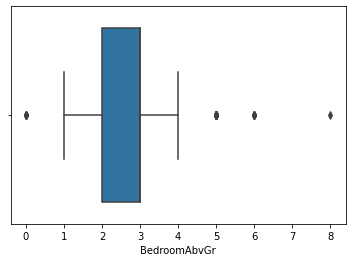

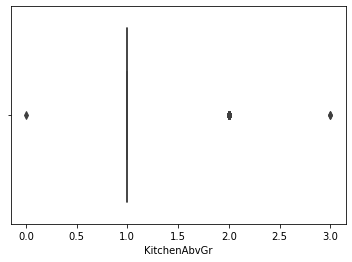

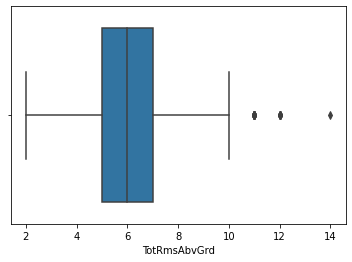

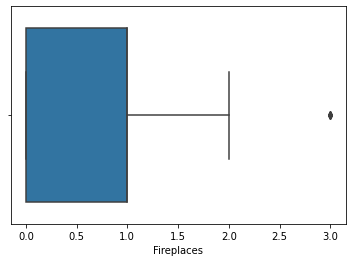

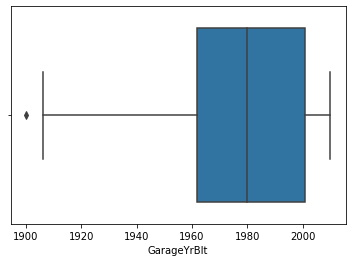

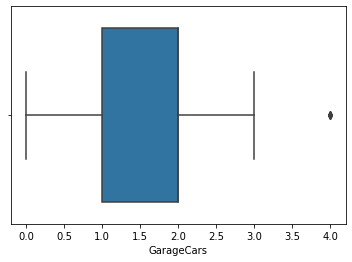

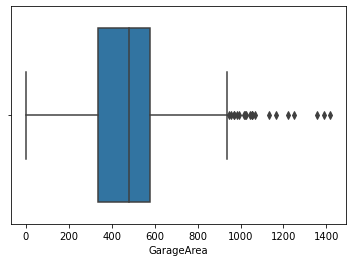

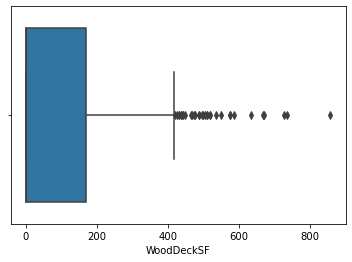

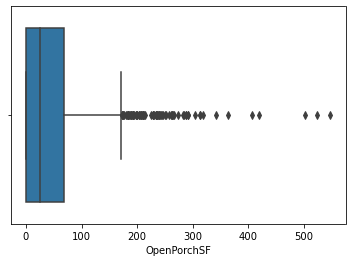

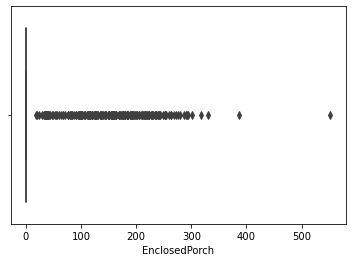

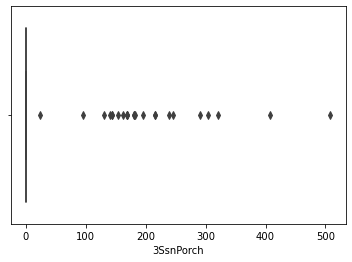

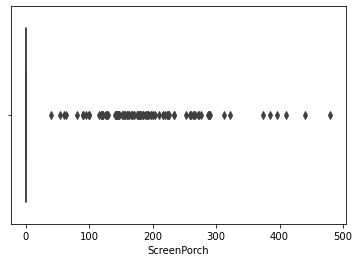

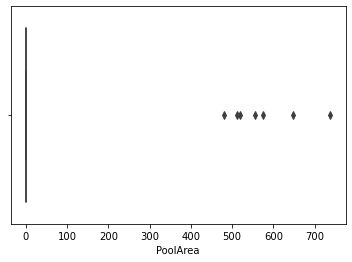

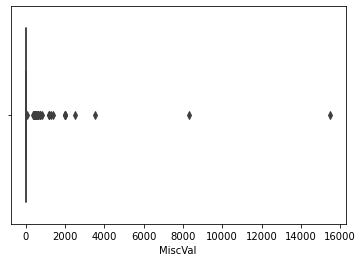

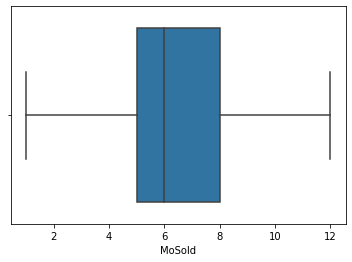

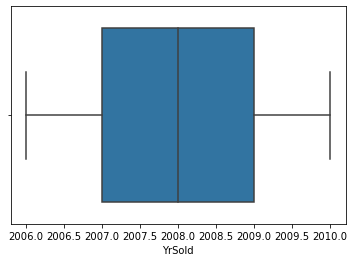

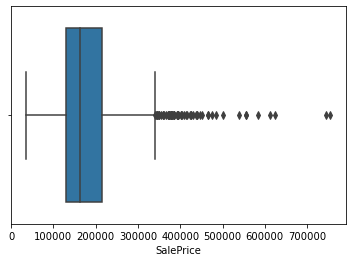

In [21]:
for i in outlier:
    sns.boxplot(train_con[i])
    plt.show()

In [22]:
for i in train_con.columns:
    q1 = train_con[i].quantile(0.25)
    q3 = train_con[i].quantile(0.75)
    IQR = q3 - q1
    uppertail = q3 + 1.5*IQR
    lowertail = q1 - 1.5*IQR   
    mean = train_con.loc[(train_con[i]<uppertail)|(train_con[i]>lowertail) ,i].mean()
    train_con.loc[(train_con[i]>uppertail)|(train_con[i]<lowertail) ,i] = mean

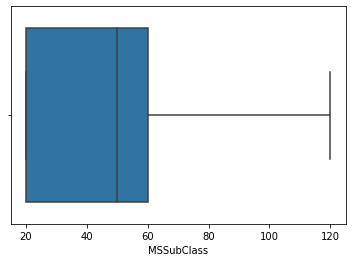

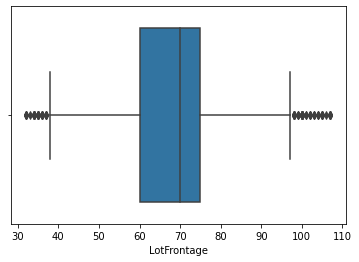

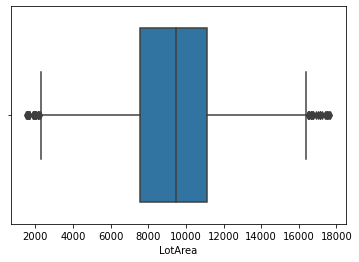

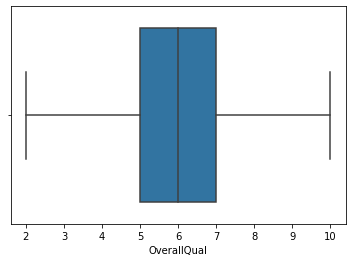

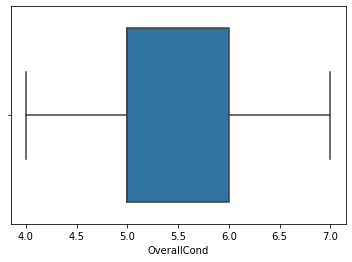

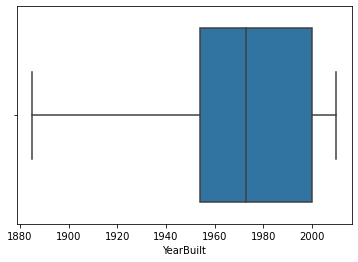

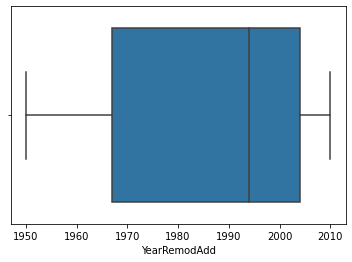

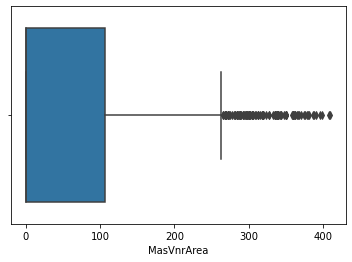

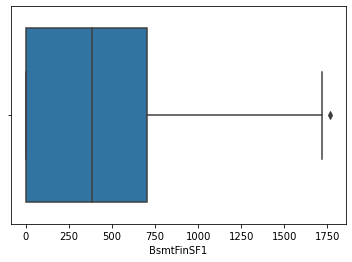

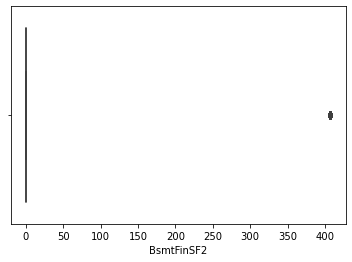

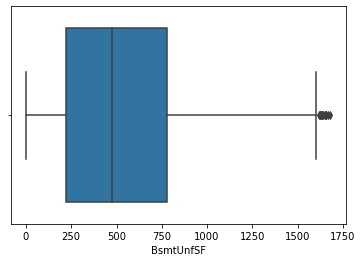

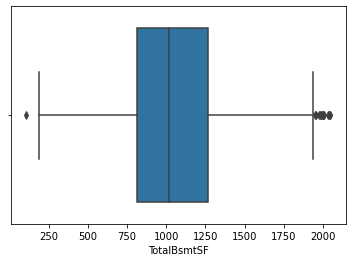

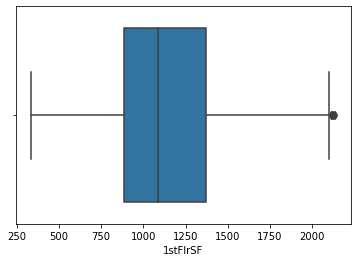

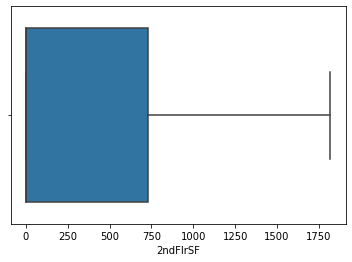

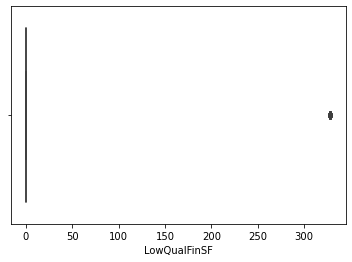

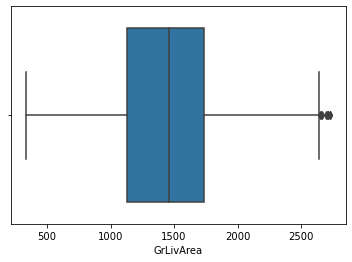

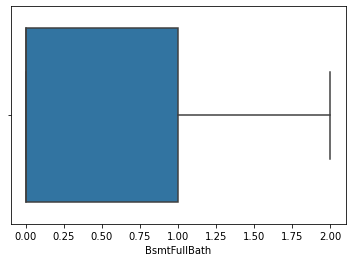

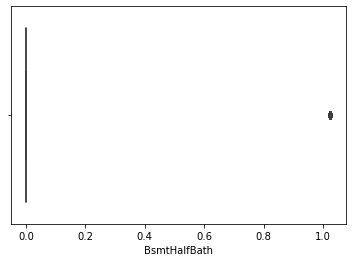

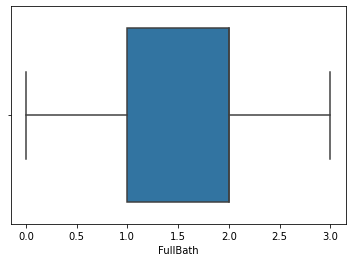

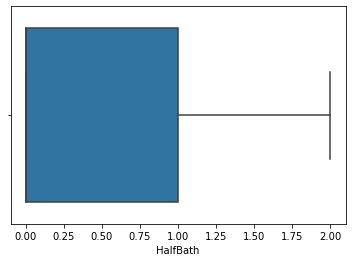

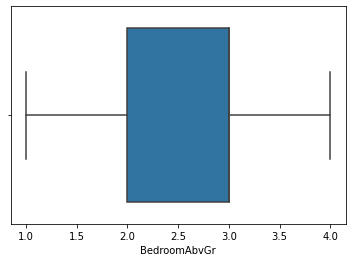

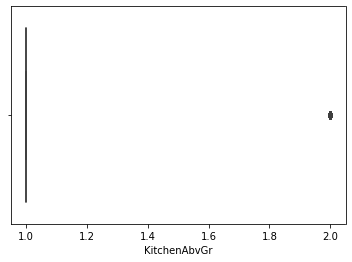

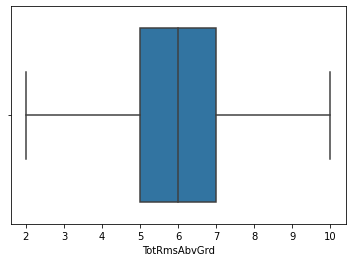

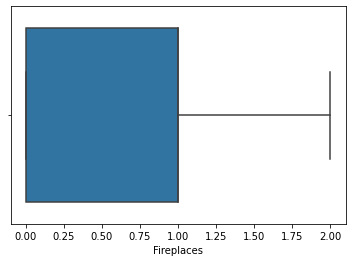

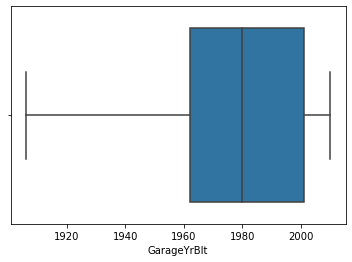

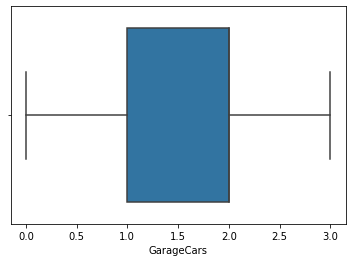

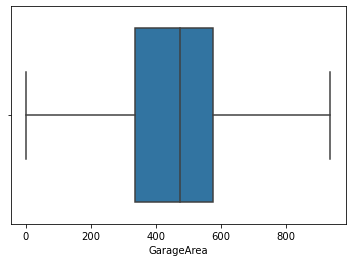

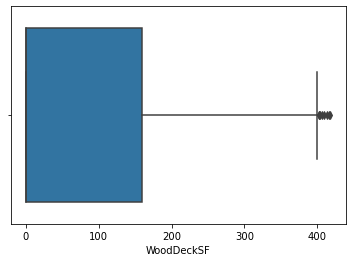

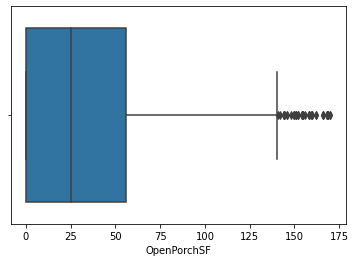

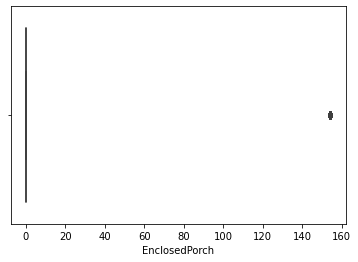

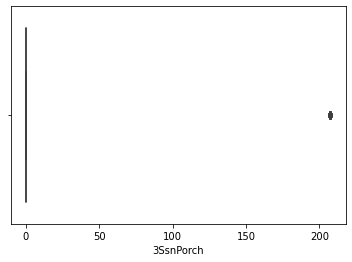

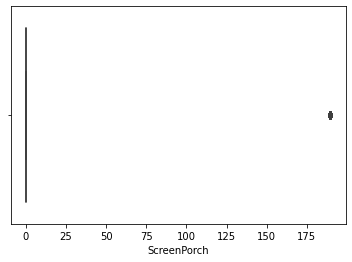

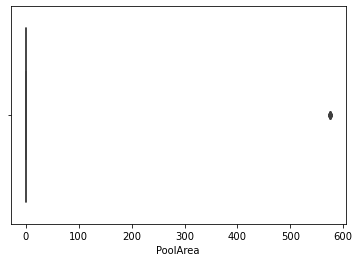

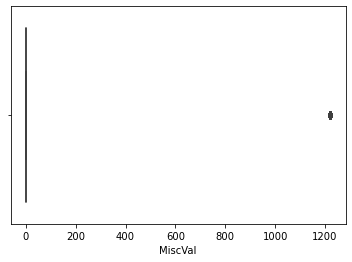

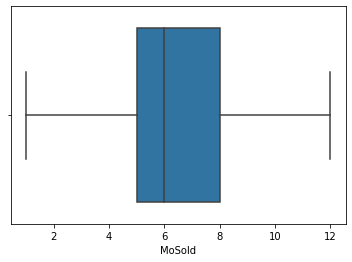

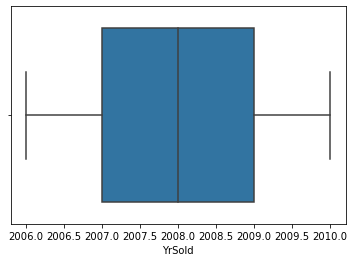

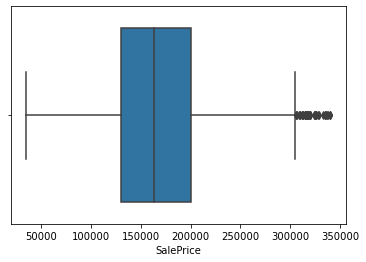

In [23]:
for i in outlier:
    sns.boxplot(train_con[i])
    plt.show()

In [24]:
train_cat

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,No alley access,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,No Fireplace,Attchd,RFn,TA,TA,Y,No Pool,No Fence,None,WD,Normal
1,RL,Pave,No alley access,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,No Pool,No Fence,None,WD,Normal
2,RL,Pave,No alley access,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,No Pool,No Fence,None,WD,Normal
3,RL,Pave,No alley access,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,No Pool,No Fence,None,WD,Abnorml
4,RL,Pave,No alley access,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,No Pool,No Fence,None,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Pave,No alley access,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,Gd,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,No Pool,No Fence,None,WD,Normal
1456,RL,Pave,No alley access,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,Plywood,Plywood,Stone,TA,TA,CBlock,Gd,TA,No,ALQ,Rec,GasA,TA,Y,SBrkr,TA,Min1,TA,Attchd,Unf,TA,TA,Y,No Pool,MnPrv,None,WD,Normal
1457,RL,Pave,No alley access,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,CemntBd,CmentBd,None,Ex,Gd,Stone,TA,Gd,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Gd,Attchd,RFn,TA,TA,Y,No Pool,GdPrv,Shed,WD,Normal
1458,RL,Pave,No alley access,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Hip,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,TA,TA,Mn,GLQ,Rec,GasA,Gd,Y,FuseA,Gd,Typ,No Fireplace,Attchd,Unf,TA,TA,Y,No Pool,No Fence,None,WD,Normal


In [25]:
train_con

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60.0,65.0,8450.0,7.0,5.000000,2003.0,2003.0,196.0,706.0,0.000000,150.0,856.0,856.0,854.0,0.0,1710.0,1.0,0.00000,2.0,1.0,3.0,1,8.0,0.0,2003.0,2.0,548.0,0.000000,61.0,0.000000,0.0,0.0,0.0,0.000000,2.0,2008.0,208500.0
1,20.0,80.0,9600.0,6.0,5.575342,1976.0,1976.0,0.0,978.0,0.000000,284.0,1262.0,1262.0,0.0,0.0,1262.0,0.0,1.02439,2.0,0.0,3.0,1,6.0,1.0,1976.0,2.0,460.0,298.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,5.0,2007.0,181500.0
2,60.0,68.0,11250.0,7.0,5.000000,2001.0,2002.0,162.0,486.0,0.000000,434.0,920.0,920.0,866.0,0.0,1786.0,1.0,0.00000,2.0,1.0,3.0,1,6.0,1.0,2001.0,2.0,608.0,0.000000,42.0,0.000000,0.0,0.0,0.0,0.000000,9.0,2008.0,223500.0
3,70.0,60.0,9550.0,7.0,5.000000,1915.0,1970.0,0.0,216.0,0.000000,540.0,756.0,961.0,756.0,0.0,1717.0,1.0,0.00000,1.0,0.0,3.0,1,7.0,1.0,1998.0,3.0,642.0,0.000000,35.0,154.100962,0.0,0.0,0.0,0.000000,2.0,2006.0,140000.0
4,60.0,84.0,14260.0,8.0,5.000000,2000.0,2000.0,350.0,655.0,0.000000,490.0,1145.0,1145.0,1053.0,0.0,2198.0,1.0,0.00000,2.0,1.0,4.0,1,9.0,1.0,2000.0,3.0,836.0,192.000000,84.0,0.000000,0.0,0.0,0.0,0.000000,12.0,2008.0,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60.0,62.0,7917.0,6.0,5.000000,1999.0,2000.0,0.0,0.0,0.000000,953.0,953.0,953.0,694.0,0.0,1647.0,0.0,0.00000,2.0,1.0,3.0,1,7.0,1.0,1999.0,2.0,460.0,0.000000,40.0,0.000000,0.0,0.0,0.0,0.000000,8.0,2007.0,175000.0
1456,20.0,85.0,13175.0,6.0,6.000000,1978.0,1988.0,119.0,790.0,406.958084,589.0,1542.0,2073.0,0.0,0.0,2073.0,1.0,0.00000,2.0,0.0,3.0,1,7.0,2.0,1978.0,2.0,500.0,349.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,2.0,2010.0,210000.0
1457,70.0,66.0,9042.0,7.0,5.575342,1941.0,2006.0,0.0,275.0,0.000000,877.0,1152.0,1188.0,1152.0,0.0,2340.0,0.0,0.00000,2.0,0.0,4.0,1,9.0,2.0,1941.0,1.0,252.0,0.000000,60.0,0.000000,0.0,0.0,0.0,1221.038462,5.0,2010.0,266500.0
1458,20.0,68.0,9717.0,5.0,6.000000,1950.0,1996.0,0.0,49.0,406.958084,0.0,1078.0,1078.0,0.0,0.0,1078.0,1.0,0.00000,1.0,0.0,2.0,1,5.0,0.0,1950.0,1.0,240.0,366.000000,0.0,154.100962,0.0,0.0,0.0,0.000000,4.0,2010.0,142125.0


## OHE of categorical columns

In [26]:
train_cat = pd.get_dummies(train_cat)
train_cat

,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,Alley_Grvl,Alley_No alley access,Alley_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_AllPub,Utilities_NoSeWa,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,...,GarageType_Detchd,GarageType_No Garage,GarageFinish_Fin,GarageFinish_No Garage,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Ex,GarageQual_Fa,GarageQual_Gd,GarageQual_No Garage,GarageQual_Po,GarageQual_TA,GarageCond_Ex,GarageCond_Fa,GarageCond_Gd,GarageCond_No Garage,GarageCond_Po,GarageCond_TA,PavedDrive_N,PavedDrive_P,PavedDrive_Y,PoolQC_Ex,PoolQC_Fa,PoolQC_Gd,PoolQC_No Pool,Fence_GdPrv,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_No Fence,MiscFeature_Gar2,MiscFeature_None,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
2,0,0,0,1,0,0,1,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
3,0,0,0,1,0,0,1,0,1,0,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0
4,0,0,0,1,0,0,1,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1456,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1457,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1458,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0


## Standardization of con columns

In [27]:
ss = StandardScaler()
X1 = ss.fit_transform(train_con)
X1

array([[ 0.39420293, -0.29281697, -0.28155101, ..., -1.5991111 ,
         0.13877749,  0.65202775],
       [-1.02253818,  0.78999922,  0.08582449, ..., -0.48911005,
        -0.61443862,  0.18649665],
       [ 0.39420293, -0.07625374,  0.61292846, ...,  0.99089135,
         0.13877749,  0.91065614],
       ...,
       [ 0.74838821, -0.22062923, -0.09243249, ..., -0.48911005,
         1.64520971,  1.65205753],
       [-1.02253818, -0.07625374,  0.12320095, ..., -0.8591104 ,
         1.64520971, -0.49240288],
       [-1.02253818,  0.42906049,  0.19348148, ..., -0.1191097 ,
         0.13877749, -0.3997277 ]])

In [28]:
df = pd.DataFrame(X1,columns=train_con.columns)
df

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,0.394203,-0.292817,-0.281551,0.652544,-0.605325,1.060721,0.878668,1.230379,0.644068,-0.359384,-0.976597,-0.598158,-0.838336,1.178192,-0.134652,0.522301,1.120711,-0.243940,0.789741,1.227585,0.242023,-0.221022,1.088511,-0.961480,1.019109,0.327019,0.421830,-0.800451,0.577836,-0.407596,-0.129279,-0.293785,-0.069409,-0.192177,-1.599111,0.138777,0.652028
1,-1.022538,0.789999,0.085824,-0.077616,0.145834,0.145344,-0.429577,-0.674047,1.287159,-0.359384,-0.642390,0.594403,0.345860,-0.797690,-0.134652,-0.484429,-0.823547,4.099375,0.789741,-0.761621,0.242023,-0.221022,-0.285975,0.628166,-0.110578,0.327019,-0.019974,2.016873,-0.837663,-0.407596,-0.129279,-0.293785,-0.069409,-0.192177,-0.489110,-0.614439,0.186497
2,0.394203,-0.076254,0.612928,0.652544,-0.605325,0.992916,0.830215,0.900020,0.123920,-0.359384,-0.268278,-0.410168,-0.651665,1.205957,-0.134652,0.693085,1.120711,-0.243940,0.789741,1.227585,0.242023,-0.221022,-0.285975,0.628166,0.935429,0.327019,0.723060,-0.800451,0.136943,-0.407596,-0.129279,-0.293785,-0.069409,-0.192177,0.990891,0.138777,0.910656
3,0.748388,-0.653756,0.069852,0.652544,-0.605325,-1.922731,-0.720298,-0.674047,-0.514443,-0.359384,-0.003905,-0.891893,-0.532078,0.951452,-0.134652,0.538031,1.120711,-0.243940,-1.026041,-0.761621,0.242023,-0.221022,0.401268,0.628166,0.809908,1.686633,0.893757,-0.800451,-0.025491,2.453412,-0.129279,-0.293785,-0.069409,-0.192177,-1.599111,-1.367655,-0.529042
4,0.394203,1.078750,1.574494,1.382705,-0.605325,0.959013,0.733308,2.726714,0.523488,-0.359384,-0.128609,0.250734,0.004602,1.638615,-0.134652,1.618918,1.120711,-0.243940,0.789741,1.227585,1.657276,-0.221022,1.775754,0.628166,0.893589,1.686633,1.867734,1.014738,1.111549,-0.407596,-0.129279,-0.293785,-0.069409,-0.192177,2.100892,0.138777,1.367566
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0.394203,-0.509380,-0.451822,-0.077616,-0.605325,0.925110,0.733308,-0.674047,-1.025134,-0.359384,1.026151,-0.313236,-0.555412,0.808004,-0.134652,0.380729,-0.823547,-0.243940,0.789741,1.227585,0.242023,-0.221022,0.401268,0.628166,0.851748,0.327019,-0.019974,-0.800451,0.090533,-0.407596,-0.129279,-0.293785,-0.069409,-0.192177,0.620891,-0.614439,0.074424
1456,-1.022538,1.150938,1.227883,-0.077616,0.700261,0.213150,0.151865,0.482212,0.842669,2.782538,0.118305,1.416860,2.711336,-0.797690,-0.134652,1.338022,1.120711,-0.243940,0.789741,-0.761621,0.242023,-0.221022,0.401268,2.217811,-0.026898,0.327019,0.180846,2.499033,-0.837663,-0.407596,-0.129279,-0.293785,-0.069409,-0.192177,-1.599111,1.645210,0.677891
1457,0.748388,-0.220629,-0.092432,0.652544,0.145834,-1.041256,1.024029,-0.674047,-0.374949,-0.359384,0.836601,0.271296,0.130022,1.867669,-0.134652,1.938015,-0.823547,-0.243940,0.789741,-0.761621,1.657276,-0.221022,1.775754,2.217811,-1.574989,-1.032595,-1.064238,-0.800451,0.554631,-0.407596,-0.129279,-0.293785,-0.069409,5.203549,-0.489110,1.645210,1.652058
1458,-1.022538,-0.076254,0.123201,-0.807777,0.700261,-0.736130,0.539493,-0.674047,-0.909283,2.782538,-1.350710,0.053932,-0.190820,-0.797690,-0.134652,-0.897908,1.120711,-0.243940,-1.026041,-0.761621,-1.173231,-0.221022,-0.973218,-0.961480,-1.198426,-1.032595,-1.124484,2.659753,-0.837663,2.453412,-0.129279,-0.293785,-0.069409,-0.192177,-0.859110,1.645210,-0.492403


In [29]:
final_df = pd.concat([train_cat,df],axis=1)
final_df

,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,Alley_Grvl,Alley_No alley access,Alley_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_AllPub,Utilities_NoSeWa,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,...,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,1,0,0.394203,-0.292817,-0.281551,0.652544,-0.605325,1.060721,0.878668,1.230379,0.644068,-0.359384,-0.976597,-0.598158,-0.838336,1.178192,-0.134652,0.522301,1.120711,-0.243940,0.789741,1.227585,0.242023,-0.221022,1.088511,-0.961480,1.019109,0.327019,0.421830,-0.800451,0.577836,-0.407596,-0.129279,-0.293785,-0.069409,-0.192177,-1.599111,0.138777,0.652028
1,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,1,0,-1.022538,0.789999,0.085824,-0.077616,0.145834,0.145344,-0.429577,-0.674047,1.287159,-0.359384,-0.642390,0.594403,0.345860,-0.797690,-0.134652,-0.484429,-0.823547,4.099375,0.789741,-0.761621,0.242023,-0.221022,-0.285975,0.628166,-0.110578,0.327019,-0.019974,2.016873,-0.837663,-0.407596,-0.129279,-0.293785,-0.069409,-0.192177,-0.489110,-0.614439,0.186497
2,0,0,0,1,0,0,1,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,1,0,0.394203,-0.076254,0.612928,0.652544,-0.605325,0.992916,0.830215,0.900020,0.123920,-0.359384,-0.268278,-0.410168,-0.651665,1.205957,-0.134652,0.693085,1.120711,-0.243940,0.789741,1.227585,0.242023,-0.221022,-0.285975,0.628166,0.935429,0.327019,0.723060,-0.800451,0.136943,-0.407596,-0.129279,-0.293785,-0.069409,-0.192177,0.990891,0.138777,0.910656
3,0,0,0,1,0,0,1,0,1,0,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0,0,0,0,0.748388,-0.653756,0.069852,0.652544,-0.605325,-1.922731,-0.720298,-0.674047,-0.514443,-0.359384,-0.003905,-0.891893,-0.532078,0.951452,-0.134652,0.538031,1.120711,-0.243940,-1.026041,-0.761621,0.242023,-0.221022,0.401268,0.628166,0.809908,1.686633,0.893757,-0.800451,-0.025491,2.453412,-0.129279,-0.293785,-0.069409,-0.192177,-1.599111,-1.367655,-0.529042
4,0,0,0,1,0,0,1,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,1,0,0.394203,1.078750,1.574494,1.382705,-0.605325,0.959013,0.733308,2.726714,0.523488,-0.359384,-0.128609,0.250734,0.004602,1.638615,-0.134652,1.618918,1.120711,-0.243940,0.789741,1.227585,1.657276,-0.221022,1.775754,0.628166,0.893589,1.686633,1.867734,1.014738,1.111549,-0.407596,-0.129279,-0.293785,-0.069409,-0.192177,2.100892,0.138777,1.367566
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,

## Exploratory Data Analysis

### Correlation

### Drop cols from X having very minute or no correlation

In [30]:
final_df.corr()

,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,Alley_Grvl,Alley_No alley access,Alley_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_AllPub,Utilities_NoSeWa,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,...,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
MSZoning_C (all),1.000000,-0.017926,-0.008742,-0.160278,-0.034792,0.254287,-0.254287,-0.015638,-0.047292,0.086418,-0.040840,-0.014116,-0.006897,0.045922,0.023234,0.030026,0.093897,-0.081736,0.002174,-0.002174,0.004292,-0.021785,-0.015146,-0.004353,0.014704,-0.091058,0.102868,-0.007871,-0.009014,-0.003076,-0.008742,-0.016891,-0.011612,-0.028101,-0.015800,-0.022519,-0.019862,0.462172,-0.009014,-0.015476,-0.035447,-0.006540,-0.019052,-0.014116,-0.019595,0.007024,-0.010961,-0.019189,-0.017042,-0.020776,...,-0.003076,0.205659,-0.004868,-0.004868,-0.025077,-0.003768,-0.065664,0.140993,-0.004353,0.084420,-0.009787,-0.091013,-0.025412,-0.018179,-0.026086,-0.015344,-0.133782,-0.026951,-0.134053,-0.107299,-0.055977,-0.041387,-0.029845,0.001250,-0.070555,-0.070734,-0.010774,0.051610,-0.053405,-0.052246,0.015811,-0.085208,-0.046730,-0.062172,0.021054,-0.029456,-0.066645,-0.029826,-0.051879,-0.046563,-0.058780,-0.037255,0.108707,-0.010736,0.006310,-0.005764,0.073659,0.042344,0.030290,-0.137681
MSZoning_FV,-0.017926,1.000000,-0.022722,-0.416608,-0.090435,-0.013866,0.013866,-0.040649,-0.274031,0.445741,-0.081464,0.023612,-0.017926,0.074564,-0.045840,-0.040649,-0.034321,0.072772,0.005651,-0.005651,-0.040692,-0.043094,0.017075,0.052219,0.045621,0.051282,-0.046595,-0.020460,-0.023429,-0.007995,-0.022722,-0.043905,-0.030184,-0.073043,-0.041068,-0.058533,-0.051628,-0.034807,-0.023429,-0.040226,-0.092136,-0.017000,-0.049521,-0.036692,-0.050934,-0.062521,-0.028491,-0.049877,-0.044297,0.862807,...,0.081793,-0.017000,-0.012654,-0.012654,0.198831,-0.009795,-0.151069,-0.006499,-0.011314,-0.019651,-0.025439,-0.124064,0.195066,0.051187,-0.024155,-0.185667,0.172380,-0.121993,0.240000,0.208816,-0.039977,-0.053942,-0.077576,0.065443,-0.043511,-0.095539,0.117065,0.046264,0.047035,-0.042179,-0.052656,0.170472,0.146078,-0.065255,-0.047709,-0.044573,-0.075567,0.234156,0.106711,0.104626,-0.055896,0.209109,-0.087983,-0.027906,-0.051137,-0.014983,-0.041483,-0.003594,0.004943,0.150392
MSZoning_RH,-0.008742,-0.022722,1.000000,-0.203158,-0.044101,-0.006762,0.006762,-0.019822,-0.027288,0.061752,-0.046176,0.021930,-0.008742,0.039092,0.107156,0.052529,-0.016737,-0.094910,0.002756,-0.002756,-0.015102,-0.027613,-0.019198,-0.005517,0.036231,-0.004248,0.009176,-0.009977,-0.011425,-0.003899,-0.011080,-0.021410,-0.014719,-0.035619,0.051637,0.023548,-0.025176,-0.016974,-0.011425,-0.019616,-0.008487,-0.008290,-0.024149,-0.017893,-0.024838,-0.030488,0.239668,-0.024323,0.145444,-0.026335,...,-0.003899,-0.008290,-0.006

In [31]:
final_df.corr()["SalePrice"]

MSZoning_C (all)   -0.137681
MSZoning_FV         0.150392
MSZoning_RH        -0.071010
MSZoning_RL         0.264210
MSZoning_RM        -0.337242
                      ...   
PoolArea            0.044127
MiscVal            -0.059700
MoSold              0.069565
YrSold             -0.028170
SalePrice           1.000000
Name: SalePrice, Length: 303, dtype: float64

In [32]:
nonCorrWithsaleprice = [column for column in final_df if abs(final_df[column].corr(final_df["SalePrice"])) < 0.05]
final_df = final_df.drop(nonCorrWithsaleprice, axis=1)
final_df

,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Alley_Grvl,Alley_No alley access,LotShape_IR1,LotShape_IR2,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LotConfig_CulDSac,LotConfig_Inside,LandSlope_Gtl,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_NAmes,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition2_Feedr,Condition2_PosA,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,HouseStyle_1.5Fin,HouseStyle_1.5Unf,...,GarageCond_Po,GarageCond_TA,PavedDrive_N,PavedDrive_P,PavedDrive_Y,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_No Fence,MiscFeature_None,MiscFeature_Shed,SaleType_COD,SaleType_Con,SaleType_New,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Partial,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,MiscVal,MoSold,SalePrice
0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,...,0,1,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0.394203,-0.292817,-0.281551,0.652544,-0.605325,1.060721,0.878668,1.230379,0.644068,-0.976597,-0.598158,-0.838336,1.178192,-0.134652,0.522301,1.120711,0.789741,1.227585,0.242023,-0.221022,1.088511,-0.961480,1.019109,0.327019,0.421830,-0.800451,0.577836,-0.407596,-0.293785,-0.192177,-1.599111,0.652028
1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,...,0,1,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,-1.022538,0.789999,0.085824,-0.077616,0.145834,0.145344,-0.429577,-0.674047,1.287159,-0.642390,0.594403,0.345860,-0.797690,-0.134652,-0.484429,-0.823547,0.789741,-0.761621,0.242023,-0.221022,-0.285975,0.628166,-0.110578,0.327019,-0.019974,2.016873,-0.837663,-0.407596,-0.293785,-0.192177,-0.489110,0.186497
2,0,0,0,1,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,...,0,1,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0.394203,-0.076254,0.612928,0.652544,-0.605325,0.992916,0.830215,0.900020,0.123920,-0.268278,-0.410168,-0.651665,1.205957,-0.134652,0.693085,1.120711,0.789741,1.227585,0.242023,-0.221022,-0.285975,0.628166,0.935429,0.327019,0.723060,-0.800451,0.136943,-0.407596,-0.293785,-0.192177,0.990891,0.910656
3,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,...,0,1,0,0,1,0,0,0,1,1,0,0,0,0,1,1,0,0,0.748388,-0.653756,0.069852,0.652544,-0.605325,-1.922731,-0.720298,-0.674047,-0.514443,-0.003905,-0.891893,-0.532078,0.951452,-0.134652,0.538031,1.120711,-1.026041,-0.761621,0.242023,-0.221022,0.401268,0.628166,0.809908,1.686633,0.893757,-0.800451,-0.025491,2.453412,-0.293785,-0.192177,-1.599111,-0.529042
4,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,...,0,1,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0.394203,1.078750,1.574494,1.382705,-0.605325,0.959013,0.733308,2.726714,0.523488,-0.128609,0.250734,0.004602,1.638615,-0.134652,1.618918,1.120711,0.789741,1.227585,1.657276,-0.221022,1.775754,0.628166,0.893589,1.686633,1.867734,1.014738,1.111549,-0.407596,-0.293785,-0.192177,2.100892,1.367566
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,

In [33]:
final_df.drop(['SalePrice'],axis=1,inplace=True)

In [34]:
final_df

,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Alley_Grvl,Alley_No alley access,LotShape_IR1,LotShape_IR2,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LotConfig_CulDSac,LotConfig_Inside,LandSlope_Gtl,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_NAmes,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition2_Feedr,Condition2_PosA,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,HouseStyle_1.5Fin,HouseStyle_1.5Unf,...,GarageCond_No Garage,GarageCond_Po,GarageCond_TA,PavedDrive_N,PavedDrive_P,PavedDrive_Y,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_No Fence,MiscFeature_None,MiscFeature_Shed,SaleType_COD,SaleType_Con,SaleType_New,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Partial,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,MiscVal,MoSold
0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0.394203,-0.292817,-0.281551,0.652544,-0.605325,1.060721,0.878668,1.230379,0.644068,-0.976597,-0.598158,-0.838336,1.178192,-0.134652,0.522301,1.120711,0.789741,1.227585,0.242023,-0.221022,1.088511,-0.961480,1.019109,0.327019,0.421830,-0.800451,0.577836,-0.407596,-0.293785,-0.192177,-1.599111
1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,-1.022538,0.789999,0.085824,-0.077616,0.145834,0.145344,-0.429577,-0.674047,1.287159,-0.642390,0.594403,0.345860,-0.797690,-0.134652,-0.484429,-0.823547,0.789741,-0.761621,0.242023,-0.221022,-0.285975,0.628166,-0.110578,0.327019,-0.019974,2.016873,-0.837663,-0.407596,-0.293785,-0.192177,-0.489110
2,0,0,0,1,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0.394203,-0.076254,0.612928,0.652544,-0.605325,0.992916,0.830215,0.900020,0.123920,-0.268278,-0.410168,-0.651665,1.205957,-0.134652,0.693085,1.120711,0.789741,1.227585,0.242023,-0.221022,-0.285975,0.628166,0.935429,0.327019,0.723060,-0.800451,0.136943,-0.407596,-0.293785,-0.192177,0.990891
3,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,1,1,0,0,0,0,1,1,0,0,0.748388,-0.653756,0.069852,0.652544,-0.605325,-1.922731,-0.720298,-0.674047,-0.514443,-0.003905,-0.891893,-0.532078,0.951452,-0.134652,0.538031,1.120711,-1.026041,-0.761621,0.242023,-0.221022,0.401268,0.628166,0.809908,1.686633,0.893757,-0.800451,-0.025491,2.453412,-0.293785,-0.192177,-1.599111
4,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0.394203,1.078750,1.574494,1.382705,-0.605325,0.959013,0.733308,2.726714,0.523488,-0.128609,0.250734,0.004602,1.638615,-0.134652,1.618918,1.120711,0.789741,1.227585,1.657276,-0.221022,1.775754,0.628166,0.893589,1.686633,1.867734,1.014738,1.111549,-0.407596,-0.293785,-0.192177,2.100892
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,.

### Multicolinearity

In [35]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = final_df.columns
vif['VIF'] = [variance_inflation_factor(final_df.values,i) for i in range(final_df.shape[1])]
vif

,Features,VIF
0,MSZoning_C (all),inf
1,MSZoning_FV,inf
2,MSZoning_RH,inf
3,MSZoning_RL,inf
4,MSZoning_RM,inf
...,...,...
202,OpenPorchSF,1.534193
203,EnclosedPorch,1.633037
204,ScreenPorch,1.232595
205,MiscVal,32.100648


In [36]:
featurestodrop = vif.loc[vif['VIF']>10]
droplist = featurestodrop['Features']
droplist = list(droplist)
len(droplist)
print(droplist)

['MSZoning_C (all)', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM', 'LotShape_IR1', 'LotShape_Reg', 'BldgType_1Fam', 'HouseStyle_1Story', 'HouseStyle_2Story', 'RoofStyle_Gable', 'RoofStyle_Hip', 'Exterior1st_CemntBd', 'Exterior1st_MetalSd', 'Exterior1st_VinylSd', 'Exterior2nd_CmentBd', 'Exterior2nd_MetalSd', 'Exterior2nd_VinylSd', 'MasVnrType_BrkFace', 'MasVnrType_None', 'MasVnrType_Stone', 'ExterQual_Ex', 'ExterQual_Fa', 'ExterQual_Gd', 'ExterQual_TA', 'ExterCond_Fa', 'ExterCond_Gd', 'ExterCond_TA', 'Foundation_BrkTil', 'Foundation_CBlock', 'Foundation_PConc', 'BsmtQual_Ex', 'BsmtQual_Fa', 'BsmtQual_Gd', 'BsmtQual_No Basement', 'BsmtQual_TA', 'BsmtCond_Fa', 'BsmtCond_Gd', 'BsmtCond_No Basement', 'BsmtCond_Po', 'BsmtCond_TA', 'BsmtExposure_Av', 'BsmtExposure_Gd', 'BsmtExposure_Mn', 'BsmtExposure_No', 'BsmtExposure_No Basement', 'BsmtFinType1_ALQ', 'BsmtFinType1_BLQ', 'BsmtFinType1_GLQ', 'BsmtFinType1_LwQ', 'BsmtFinType1_No Basement', 'BsmtFinType1_Rec', 'BsmtFinType1_Unf',

In [37]:
new_df = final_df.drop(droplist,axis=1)
new_df

,Alley_Grvl,Alley_No alley access,LotShape_IR2,LandContour_Bnk,LandContour_HLS,LandContour_Low,LotConfig_CulDSac,LotConfig_Inside,LandSlope_Gtl,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_NAmes,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition2_Feedr,Condition2_PosA,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_SFoyer,RoofMatl_CompShg,RoofMatl_WdShake,Exterior1st_AsbShng,Exterior1st_BrkComm,Exterior1st_HdBoard,Exterior1st_Stone,Exterior1st_Stucco,...,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Typ,FireplaceQu_Ex,FireplaceQu_Po,FireplaceQu_TA,GarageType_BuiltIn,GarageType_CarPort,GarageQual_Gd,GarageQual_Po,GarageCond_Fa,GarageCond_Po,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_No Fence,SaleType_COD,SaleType_Con,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,MoSold
0,0,1,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0.394203,-0.292817,-0.281551,0.652544,-0.605325,0.878668,1.230379,0.644068,-0.976597,-0.598158,-0.838336,-0.134652,0.522301,1.120711,0.789741,1.227585,0.242023,-0.221022,1.088511,-0.961480,1.019109,0.327019,0.421830,-0.800451,0.577836,-0.407596,-0.293785,-1.599111
1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,-1.022538,0.789999,0.085824,-0.077616,0.145834,-0.429577,-0.674047,1.287159,-0.642390,0.594403,0.345860,-0.134652,-0.484429,-0.823547,0.789741,-0.761621,0.242023,-0.221022,-0.285975,0.628166,-0.110578,0.327019,-0.019974,2.016873,-0.837663,-0.407596,-0.293785,-0.489110
2,0,1,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0.394203,-0.076254,0.612928,0.652544,-0.605325,0.830215,0.900020,0.123920,-0.268278,-0.410168,-0.651665,-0.134652,0.693085,1.120711,0.789741,1.227585,0.242023,-0.221022,-0.285975,0.628166,0.935429,0.327019,0.723060,-0.800451,0.136943,-0.407596,-0.293785,0.990891
3,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0.748388,-0.653756,0.069852,0.652544,-0.605325,-0.720298,-0.674047,-0.514443,-0.003905,-0.891893,-0.532078,-0.134652,0.538031,1.120711,-1.026041,-0.761621,0.242023,-0.221022,0.401268,0.628166,0.809908,1.686633,0.893757,-0.800451,-0.025491,2.453412,-0.293785,-1.599111
4,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0.394203,1.078750,1.574494,1.382705,-0.605325,0.733308,2.726714,0.523488,-0.128609,0.250734,0.004602,-0.134652,1.618918,1.120711,0.789741,1.227585,1.657276,-0.221022,1.775754,0.628166,0.893589,1.686633,1.867734,1.014738,1.111549,-0.407596,-0.293785,2.100892
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

In [38]:
x = new_df
y = train_df['SalePrice']

In [39]:
x

,Alley_Grvl,Alley_No alley access,LotShape_IR2,LandContour_Bnk,LandContour_HLS,LandContour_Low,LotConfig_CulDSac,LotConfig_Inside,LandSlope_Gtl,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_NAmes,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition2_Feedr,Condition2_PosA,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_SFoyer,RoofMatl_CompShg,RoofMatl_WdShake,Exterior1st_AsbShng,Exterior1st_BrkComm,Exterior1st_HdBoard,Exterior1st_Stone,Exterior1st_Stucco,...,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Typ,FireplaceQu_Ex,FireplaceQu_Po,FireplaceQu_TA,GarageType_BuiltIn,GarageType_CarPort,GarageQual_Gd,GarageQual_Po,GarageCond_Fa,GarageCond_Po,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_No Fence,SaleType_COD,SaleType_Con,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,MoSold
0,0,1,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0.394203,-0.292817,-0.281551,0.652544,-0.605325,0.878668,1.230379,0.644068,-0.976597,-0.598158,-0.838336,-0.134652,0.522301,1.120711,0.789741,1.227585,0.242023,-0.221022,1.088511,-0.961480,1.019109,0.327019,0.421830,-0.800451,0.577836,-0.407596,-0.293785,-1.599111
1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,-1.022538,0.789999,0.085824,-0.077616,0.145834,-0.429577,-0.674047,1.287159,-0.642390,0.594403,0.345860,-0.134652,-0.484429,-0.823547,0.789741,-0.761621,0.242023,-0.221022,-0.285975,0.628166,-0.110578,0.327019,-0.019974,2.016873,-0.837663,-0.407596,-0.293785,-0.489110
2,0,1,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0.394203,-0.076254,0.612928,0.652544,-0.605325,0.830215,0.900020,0.123920,-0.268278,-0.410168,-0.651665,-0.134652,0.693085,1.120711,0.789741,1.227585,0.242023,-0.221022,-0.285975,0.628166,0.935429,0.327019,0.723060,-0.800451,0.136943,-0.407596,-0.293785,0.990891
3,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0.748388,-0.653756,0.069852,0.652544,-0.605325,-0.720298,-0.674047,-0.514443,-0.003905,-0.891893,-0.532078,-0.134652,0.538031,1.120711,-1.026041,-0.761621,0.242023,-0.221022,0.401268,0.628166,0.809908,1.686633,0.893757,-0.800451,-0.025491,2.453412,-0.293785,-1.599111
4,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0.394203,1.078750,1.574494,1.382705,-0.605325,0.733308,2.726714,0.523488,-0.128609,0.250734,0.004602,-0.134652,1.618918,1.120711,0.789741,1.227585,1.657276,-0.221022,1.775754,0.628166,0.893589,1.686633,1.867734,1.014738,1.111549,-0.407596,-0.293785,2.100892
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

In [40]:
y

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

## Divide data in training & testing set

In [41]:
xtrain,xtest,ytrain,ytest= train_test_split(x,y,test_size=0.2,random_state=31)

## Model Building

In [42]:
lin_model = LinearRegression()
lin_model.fit(xtrain,ytrain)

LinearRegression()

In [43]:
pd.options.display.max_rows=200

## Backward elemination

In [44]:
# sfs = SequentialFeatureSelector(lin_model,direction='backward')
# sfs.fit(x,y)

# array = sfs.get_support()
# s1 = pd.Series(array,index = x.columns)
# s1

In [45]:
# s1.sort_values()

In [46]:
droplist1 = ['Condition2_PosA','GarageQual_Gd','HouseStyle_1.5Fin','HouseStyle_SFoyer','RoofMatl_CompShg','RoofMatl_WdShake','Exterior1st_AsbShng','SaleCondition_AdjLand','Exterior1st_Stucco','Exterior2nd_AsbShng','SaleCondition_Abnorml','Exterior2nd_HdBoard','Exterior2nd_Other','Exterior2nd_Stucco','ScreenPorch','GarageCond_Po','Fence_GdWo','Fence_MnPrv','FireplaceQu_Po','Fence_MnWw','MasVnrArea','Functional_Min2','Functional_Maj2','SaleType_Con','Heating_GasA','BsmtFinType2_BLQ','Foundation_Slab','Functional_Min1','Condition1_PosN','YearRemodAdd','GarageCond_Fa','TotRmsAbvGrd','KitchenAbvGr','Neighborhood_Edwards','BedroomAbvGr','GarageArea','Condition1_PosA','Neighborhood_NAmes','LotConfig_Inside','GrLivArea','LowQualFinSF','Neighborhood_OldTown','Neighborhood_Sawyer','LandContour_HLS','Neighborhood_SawyerW','Neighborhood_Somerst','TotalBsmtSF','Neighborhood_Timber','BsmtUnfSF','Alley_No alley access','Condition1_Artery','Condition1_Feedr','LandContour_Low','Exterior1st_Stone']

In [47]:
x = x.drop(droplist1,axis=1)
x

,Alley_Grvl,LotShape_IR2,LandContour_Bnk,LotConfig_CulDSac,LandSlope_Gtl,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_SWISU,Neighborhood_StoneBr,Neighborhood_Veenker,Condition1_Norm,Condition2_Feedr,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,HouseStyle_1.5Unf,Exterior1st_BrkComm,Exterior1st_HdBoard,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_Brk Cmn,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,BsmtFinType2_Unf,Heating_Grav,Heating_Wall,Functional_Typ,FireplaceQu_Ex,FireplaceQu_TA,GarageType_BuiltIn,GarageType_CarPort,GarageQual_Po,Fence_No Fence,SaleType_COD,SaleType_WD,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,BsmtFinSF1,1stFlrSF,BsmtFullBath,FullBath,HalfBath,Fireplaces,GarageYrBlt,GarageCars,WoodDeckSF,OpenPorchSF,EnclosedPorch,MoSold
0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0.394203,-0.292817,-0.281551,0.652544,-0.605325,0.644068,-0.838336,1.120711,0.789741,1.227585,-0.961480,1.019109,0.327019,-0.800451,0.577836,-0.407596,-1.599111
1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,1,-1.022538,0.789999,0.085824,-0.077616,0.145834,1.287159,0.345860,-0.823547,0.789741,-0.761621,0.628166,-0.110578,0.327019,2.016873,-0.837663,-0.407596,-0.489110
2,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,1,0.394203,-0.076254,0.612928,0.652544,-0.605325,0.123920,-0.651665,1.120711,0.789741,1.227585,0.628166,0.935429,0.327019,-0.800451,0.136943,-0.407596,0.990891
3,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,0,1,0,1,0.748388,-0.653756,0.069852,0.652544,-0.605325,-0.514443,-0.532078,1.120711,-1.026041,-0.761621,0.628166,0.809908,1.686633,-0.800451,-0.025491,2.453412,-1.599111
4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,1,0.394203,1.078750,1.574494,1.382705,-0.605325,0.523488,0.004602,1.120711,0.789741,1.227585,0.628166,0.893589,1.686633,1.014738,1.111549,-0.407596,2.100892
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,1,0.394203,-0.509380,-0.451822,-0.077616,-0.605325,-1.025134,-0.555412,-0.823547,0.789741,1.227585,0.628166,0.851748,0.327019,-0.800451,0.090533,-0.407596,0.620891
1456,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,-1.022538,1.150938,1.227883,-0.077616,0.700261,0.842669,2.711336,1.120711,0.789741,-0.761621,2.217811,-0.026898,0.327019,2.499033,-0.837663,-0.407596,-1.599111
1457,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0.748388,-0.220629,-0.092432,0.652544,0.145834,-0.374949,0.130022,-0.823547,0.789741,-0.761621,2.217811,-1.574989,-1.032595,-0.800451,0.554631,-0.407596,-0.489110
1458,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,-1.022538,-0.076254,0.123201,-0.807777,0.700261,-0.909283,-0.190820,1.120711,-1.026041,-0.761621,-0.961480,-1.198426,-1.032595,2.659753,-0.837663,2.453412,-0.859110


In [48]:
x.columns

Index(['Alley_Grvl', 'LotShape_IR2', 'LandContour_Bnk', 'LotConfig_CulDSac',
       'LandSlope_Gtl', 'Neighborhood_BrDale', 'Neighborhood_BrkSide',
       'Neighborhood_ClearCr', 'Neighborhood_CollgCr', 'Neighborhood_Crawfor',
       'Neighborhood_Gilbert', 'Neighborhood_IDOTRR', 'Neighborhood_MeadowV',
       'Neighborhood_NWAmes', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt',
       'Neighborhood_SWISU', 'Neighborhood_StoneBr', 'Neighborhood_Veenker',
       'Condition1_Norm', 'Condition2_Feedr', 'BldgType_2fmCon',
       'BldgType_Duplex', 'BldgType_Twnhs', 'HouseStyle_1.5Unf',
       'Exterior1st_BrkComm', 'Exterior1st_HdBoard', 'Exterior1st_Wd Sdng',
       'Exterior1st_WdShing', 'Exterior2nd_Brk Cmn', 'Exterior2nd_Wd Sdng',
       'Exterior2nd_Wd Shng', 'BsmtFinType2_Unf', 'Heating_Grav',
       'Heating_Wall', 'Functional_Typ', 'FireplaceQu_Ex', 'FireplaceQu_TA',
       'GarageType_BuiltIn', 'GarageType_CarPort', 'GarageQual_Po',
       'Fence_No Fence', 'SaleType_COD', 'SaleT

In [49]:
xtrain,xtest,ytrain,ytest= train_test_split(x,y,test_size=0.2,random_state=31)

In [50]:
lin_model = LinearRegression()
lin_model.fit(xtrain,ytrain)

LinearRegression()

In [51]:
# Training data evaluation
ypredtrain = lin_model.predict(xtrain)

MAE = mean_absolute_error(ytrain,ypredtrain)
print('Mean absolute error:',MAE)

MSE = mean_squared_error(ytrain,ypredtrain)
print('Mean squared error:',MSE)

RSquared = r2_score(ytrain,ypredtrain)
print('R-Squared:',RSquared)

Mean absolute error: 19649.287739842737
Mean squared error: 906427551.9266589
R-Squared: 0.8486695670125491


In [52]:
# Testing data evaluation
ypredtest = lin_model.predict(xtest)

MAE = mean_absolute_error(ytest,ypredtest)
print('Mean absolute error:',MAE)

MSE = mean_squared_error(ytest,ypredtest)
print('Mean squared error:',MSE)

RSquared = r2_score(ytest,ypredtest)
print('R-Squared:',RSquared)

Mean absolute error: 23264.51285832264
Mean squared error: 1437242551.907204
R-Squared: 0.8094862881271876


## Hyperparameter Tunning (Lasso | Ridge)

## Lasso Regression

In [53]:
lasso_model = Lasso()
lasso_model.fit(xtrain,ytrain)

Lasso()

In [54]:
# Training data evaluation
ypredtrain = lasso_model.predict(xtrain)

MAE = mean_absolute_error(ytrain,ypredtrain)
print('Mean absolute error:',MAE)

MSE = mean_squared_error(ytrain,ypredtrain)
print('Mean squared error:',MSE)

RSquared = r2_score(ytrain,ypredtrain)
print('R-Squared:',RSquared)

Mean absolute error: 19648.45445780945
Mean squared error: 906432816.0533926
R-Squared: 0.8486686881529246


In [1]:
# Testing data evaluation
ypredtest = lasso_model.predict(xtest)

MAE = mean_absolute_error(ytest,ypredtest)
print('Mean absolute error:',MAE)

MSE = mean_squared_error(ytest,ypredtest)
print('Mean squared error:',MSE)

RSquared = r2_score(ytest,ypredtest)
print('R-Squared:',RSquared)

NameError: name 'lasso_model' is not defined

In [56]:
lasso_model = Lasso()
hyp_grid = {'alpha':np.arange(0.1,1,0.01)}

gscv_lasso_model = GridSearchCV(lasso_model,hyp_grid,cv=5)
gscv_lasso_model.fit(xtrain,ytrain)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': array([0.1 , 0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 ,
       0.21, 0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31,
       0.32, 0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42,
       0.43, 0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53,
       0.54, 0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64,
       0.65, 0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75,
       0.76, 0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86,
       0.87, 0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97,
       0.98, 0.99])})

In [57]:
gscv_lasso_model.best_estimator_  # best value of alpha

Lasso(alpha=0.9899999999999995)

In [58]:
lasso_model_out = gscv_lasso_model.best_estimator_   
lasso_model_out.fit(xtrain,ytrain)

Lasso(alpha=0.9899999999999995)

In [59]:
# Testing data evaluation
ypredtest1 = lasso_model_out.predict(xtest)

MSE1 = mean_squared_error(ytest,ypredtest)
print('Mean squared error:',MSE)

r21 = r2_score(ytest,ypredtest)
print('R squared:',r21)

Mean squared error: 1437242551.907204
R squared: 0.8094862881271876


In [60]:
# Training data evaluation
ypredtrain2 = lasso_model_out.predict(xtrain)

MSE2 = mean_squared_error(ytrain,ypredtrain)
print('Mean squared error:',MSE)

r22= r2_score(ytrain,ypredtrain)
print('R squared:',r22)

Mean squared error: 1437242551.907204
R squared: 0.8486686881529246


## Ridge Regression

In [61]:
ridge_model = Ridge()
ridge_model.fit(xtrain,ytrain)

Ridge()

In [62]:
# Testing data evaluation
ypredtest = ridge_model.predict(xtest)

Mean_absolute_error = mean_absolute_error(ytest,ypredtest)
print('Mean_absolute_error:',Mean_absolute_error)

Mean_squared_error = mean_squared_error(ytest,ypredtest)
print('Mean_squared_error:',Mean_squared_error)

RSquared = r2_score(ytest,ypredtest)
print('R-Squared:',RSquared)

Mean_absolute_error: 23054.983997126816
Mean_squared_error: 1436533900.5123332
R-Squared: 0.8095802234253608


In [63]:
# Training data evaluation
ypredtrain = ridge_model.predict(xtrain)

Mean_absolute_error = mean_absolute_error(ytrain,ypredtrain)
print('Mean_absolute_error:',Mean_absolute_error)

Mean_squared_error = mean_squared_error(ytrain,ypredtrain)
print('Mean_squared_error:',Mean_squared_error)

RSquared = r2_score(ytrain,ypredtrain)
print('R-Squared:',RSquared)

Mean_absolute_error: 19647.27640564407
Mean_squared_error: 907111874.3384575
R-Squared: 0.8485553176093172


In [64]:
ridge_model = Ridge()
hyp_grid = {'alpha':np.arange(0.1,1,0.01)}

gscv_ridge_model = GridSearchCV(ridge_model,hyp_grid,cv=5)
gscv_ridge_model.fit(xtrain,ytrain)
gscv_ridge_model.best_estimator_

Ridge(alpha=0.9899999999999995)

In [65]:
ridge_model = Ridge(alpha=0.9899999999999995)
ridge_model.fit(xtrain,ytrain)

# Testing data evaluation
ypredtest = ridge_model.predict(xtest)

MSE = mean_squared_error(ytest,ypredtest)
print('Mean squared error:',MSE)

r2 = r2_score(ytest,ypredtest)
print('R squared:',r2)

Mean squared error: 1436524500.4907577
R squared: 0.8095814694453869


In [66]:
# Training data evaluation
ypredtrain = ridge_model.predict(xtrain)

MSE = mean_squared_error(ytrain,ypredtrain)
print('Mean squared error:',MSE)

r2 = r2_score(ytrain,ypredtrain)
print('R squared:',r2)

Mean squared error: 907099979.2450658
R squared: 0.8485573035260401


## Reading testing data

In [67]:
test_df = pd.read_csv("testing_set.csv")
test_df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,7,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,546.0,546.0,GasA,Gd,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,5,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,4,5,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,252.0,Unf,0.0,294.0,546.0,GasA,TA,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,6,Typ,0,NaN,CarPort,1970.0,Unf,1.0,286.0,TA,TA,Y,0,24,0,0,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,7,1960,1996,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,1224.0,Unf,0.0,0.0,1224.0,GasA,Ex,Y,SBrkr,1224,0,0,1224,1.0,0.0,1,0,4,1,TA,7,Typ,1,TA,Detchd,1960.0,Unf,2.0,576.0,TA,TA,Y,474,0,0,0,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,SFoyer,5,5,1992,1992,Gable,Comp

### Drop unnecessary columns(Columns with no statitical importance)

In [68]:
test_df.drop(["Id"],axis=1,inplace = True)
test_df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,7,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,546.0,546.0,GasA,Gd,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,5,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,4,5,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,252.0,Unf,0.0,294.0,546.0,GasA,TA,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,6,Typ,0,NaN,CarPort,1970.0,Unf,1.0,286.0,TA,TA,Y,0,24,0,0,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,7,1960,1996,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,1224.0,Unf,0.0,0.0,1224.0,GasA,Ex,Y,SBrkr,1224,0,0,1224,1.0,0.0,1,0,4,1,TA,7,Typ,1,TA,Detchd,1960.0,Unf,2.0,576.0,TA,TA,Y,474,0,0,0,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,SFoyer,5,5,1992,1992,Gable,CompShg,HdBoard,Wd Shng,None,0.0,TA,TA,PConc,Gd,TA,Av,GL

In [69]:
test_df.shape

(1459, 79)

In [70]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1459 non-null   int64  
 1   MSZoning       1455 non-null   object 
 2   LotFrontage    1232 non-null   float64
 3   LotArea        1459 non-null   int64  
 4   Street         1459 non-null   object 
 5   Alley          107 non-null    object 
 6   LotShape       1459 non-null   object 
 7   LandContour    1459 non-null   object 
 8   Utilities      1457 non-null   object 
 9   LotConfig      1459 non-null   object 
 10  LandSlope      1459 non-null   object 
 11  Neighborhood   1459 non-null   object 
 12  Condition1     1459 non-null   object 
 13  Condition2     1459 non-null   object 
 14  BldgType       1459 non-null   object 
 15  HouseStyle     1459 non-null   object 
 16  OverallQual    1459 non-null   int64  
 17  OverallCond    1459 non-null   int64  
 18  YearBuil

## Missing Data treatment

In [71]:
test_df.isna().sum().sort_values(ascending=False)

PoolQC           1456
MiscFeature      1408
Alley            1352
Fence            1169
FireplaceQu       730
LotFrontage       227
GarageYrBlt        78
GarageFinish       78
GarageQual         78
GarageCond         78
GarageType         76
BsmtCond           45
BsmtExposure       44
BsmtQual           44
BsmtFinType2       42
BsmtFinType1       42
MasVnrType         16
MasVnrArea         15
MSZoning            4
Functional          2
BsmtHalfBath        2
BsmtFullBath        2
Utilities           2
KitchenQual         1
SaleType            1
BsmtFinSF1          1
GarageCars          1
BsmtUnfSF           1
TotalBsmtSF         1
Exterior2nd         1
Exterior1st         1
GarageArea          1
BsmtFinSF2          1
TotRmsAbvGrd        0
KitchenAbvGr        0
Fireplaces          0
MSSubClass          0
HalfBath            0
PavedDrive          0
WoodDeckSF          0
OpenPorchSF         0
EnclosedPorch       0
3SsnPorch           0
ScreenPorch         0
PoolArea            0
MiscVal   

In [72]:
test_df['PoolQC'].fillna('No Pool',inplace=True)
test_df['MiscFeature'].fillna('None',inplace=True)
test_df['Alley'].fillna('No alley access',inplace=True)
test_df['Fence'].fillna('No Fence',inplace=True)
test_df['FireplaceQu'].fillna('No Fireplace',inplace=True)
test_df['GarageCond'].fillna('No Garage',inplace=True)
test_df['GarageType'].fillna('No Garage',inplace=True)
test_df['GarageFinish'].fillna('No Garage',inplace=True)
test_df['GarageQual'].fillna('No Garage',inplace=True)
test_df['BsmtExposure'].fillna('No Basement',inplace=True)
test_df['BsmtFinType2'].fillna('No Basement',inplace=True)
test_df['BsmtCond'].fillna('No Basement',inplace=True)
test_df['BsmtQual'].fillna('No Basement',inplace=True)
test_df['BsmtFinType1'].fillna('No Basement',inplace=True)
test_df['MasVnrType'].fillna('None',inplace=True)
test_df['GarageYrBlt'].fillna(test_df['GarageYrBlt'].median(),inplace=True)
test_df['MasVnrArea'].fillna(test_df['MasVnrArea'].mean(),inplace=True)
test_df['LotFrontage'].fillna(test_df['LotFrontage'].mean(),inplace=True)
test_df['Electrical'].fillna(test_df['Electrical'].mode()[0],inplace=True)
test_df['BsmtHalfBath'].fillna(test_df['BsmtHalfBath'].mean(),inplace=True)
test_df['BsmtFullBath'].fillna(test_df['BsmtFullBath'].mean(),inplace=True)
test_df['BsmtFinSF1'].fillna(test_df['BsmtFinSF1'].mean(),inplace=True)
test_df['BsmtFinSF2'].fillna(test_df['BsmtFinSF2'].mean(),inplace=True)
test_df['BsmtUnfSF'].fillna(test_df['BsmtUnfSF'].mean(),inplace=True)
test_df['TotalBsmtSF'].fillna(test_df['TotalBsmtSF'].mean(),inplace=True)
test_df['GarageCars'].fillna(test_df['GarageCars'].mean(),inplace=True)
test_df['GarageArea'].fillna(test_df['GarageArea'].mean(),inplace=True)
test_df['MSZoning'].fillna(test_df['MSZoning'].mode()[0],inplace=True)
test_df['Functional'].fillna(test_df['Functional'].mode()[0],inplace=True)
test_df['Utilities'].fillna(test_df['Utilities'].mode()[0],inplace=True)
test_df['KitchenQual'].fillna(test_df['KitchenQual'].mode()[0],inplace=True)
test_df['SaleType'].fillna(test_df['SaleType'].mode()[0],inplace=True)
test_df['Exterior1st'].fillna(test_df['Exterior1st'].mode()[0],inplace=True)
test_df['Exterior2nd'].fillna(test_df['Exterior2nd'].mode()[0],inplace=True)

In [73]:
test_df.isna().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
Alley            0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual 

In [74]:
cat = []
con = []
for i in test_df.columns:
    if(test_df[i].dtypes == "object"):
        cat.append(i)
    else:
        con.append(i)

In [75]:
cat

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [76]:
con

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold']

In [77]:
test_cat = test_df[cat]
test_cat

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RH,Pave,No alley access,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,CBlock,TA,TA,No,Rec,LwQ,GasA,TA,Y,SBrkr,TA,Typ,No Fireplace,Attchd,Unf,TA,TA,Y,No Pool,MnPrv,None,WD,Normal
1,RL,Pave,No alley access,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,TA,TA,CBlock,TA,TA,No,ALQ,Unf,GasA,TA,Y,SBrkr,Gd,Typ,No Fireplace,Attchd,Unf,TA,TA,Y,No Pool,No Fence,Gar2,WD,Normal
2,RL,Pave,No alley access,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Gd,Y,SBrkr,TA,Typ,TA,Attchd,Fin,TA,TA,Y,No Pool,MnPrv,None,WD,Normal
3,RL,Pave,No alley access,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,TA,TA,PConc,TA,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Gd,Attchd,Fin,TA,TA,Y,No Pool,No Fence,None,WD,Normal
4,RL,Pave,No alley access,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,Gable,CompShg,HdBoard,HdBoard,None,Gd,TA,PConc,Gd,TA,No,ALQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,No Fireplace,Attchd,RFn,TA,TA,Y,No Pool,No Fence,None,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,RM,Pave,No alley access,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,Gable,CompShg,CemntBd,CmentBd,None,TA,TA,CBlock,TA,TA,No,Unf,Unf,GasA,Gd,Y,SBrkr,TA,Typ,No Fireplace,No Garage,No Garage,No Garage,No Garage,Y,No Pool,No Fence,None,WD,Normal
1455,RM,Pave,No alley access,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,Gable,CompShg,CemntBd,CmentBd,None,TA,TA,CBlock,TA,TA,No,Rec,Unf,GasA,TA,Y,SBrkr,TA,Typ,No Fireplace,CarPort,Unf,TA,TA,Y,No Pool,No Fence,None,WD,Abnorml
1456,RL,Pave,No alley access,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,CBlock,TA,TA,No,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Detchd,Unf,TA,TA,Y,No Pool,No Fence,None,WD,Abnorml
1457,RL,Pave,No alley access,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,SFoyer,Gable,CompShg,HdBoard,Wd Shng,None,TA,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,TA,Y,SBrkr,TA,Typ,No Fireplace,No Garage,No Garage,No Garage,No Garage,Y,No Pool,MnPrv,Shed,WD,Normal


In [78]:
test_con = test_df[con]
test_con

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,20,80.0,11622,5,6,1961,1961,0.0,468.0,144.0,270.0,882.0,896,0,0,896,0.0,0.0,1,0,2,1,5,0,1961.0,1.0,730.0,140,0,0,0,120,0,0,6,2010
1,20,81.0,14267,6,6,1958,1958,108.0,923.0,0.0,406.0,1329.0,1329,0,0,1329,0.0,0.0,1,1,3,1,6,0,1958.0,1.0,312.0,393,36,0,0,0,0,12500,6,2010
2,60,74.0,13830,5,5,1997,1998,0.0,791.0,0.0,137.0,928.0,928,701,0,1629,0.0,0.0,2,1,3,1,6,1,1997.0,2.0,482.0,212,34,0,0,0,0,0,3,2010
3,60,78.0,9978,6,6,1998,1998,20.0,602.0,0.0,324.0,926.0,926,678,0,1604,0.0,0.0,2,1,3,1,7,1,1998.0,2.0,470.0,360,36,0,0,0,0,0,6,2010
4,120,43.0,5005,8,5,1992,1992,0.0,263.0,0.0,1017.0,1280.0,1280,0,0,1280,0.0,0.0,2,0,2,1,5,0,1992.0,2.0,506.0,0,82,0,0,144,0,0,1,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,160,21.0,1936,4,7,1970,1970,0.0,0.0,0.0,546.0,546.0,546,546,0,1092,0.0,0.0,1,1,3,1,5,0,1979.0,0.0,0.0,0,0,0,0,0,0,0,6,2006
1455,160,21.0,1894,4,5,1970,1970,0.0,252.0,0.0,294.0,546.0,546,546,0,1092,0.0,0.0,1,1,3,1,6,0,1970.0,1.0,286.0,0,24,0,0,0,0,0,4,2006
1456,20,160.0,20000,5,7,1960,1996,0.0,1224.0,0.0,0.0,1224.0,1224,0,0,1224,1.0,0.0,1,0,4,1,7,1,1960.0,2.0,576.0,474,0,0,0,0,0,0,9,2006
1457,85,62.0,10441,5,5,1992,1992,0.0,337.0,0.0,575.0,912.0,970,0,0,970,0.0,1.0,1,0,3,1,6,0,1979.0,0.0,0.0,80,32,0,0,0,0,700,7,2006


In [79]:
test_con.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold'],
      dtype='object')

In [80]:
test_con.shape

(1459, 36)

## Outliers

<AxesSubplot:>

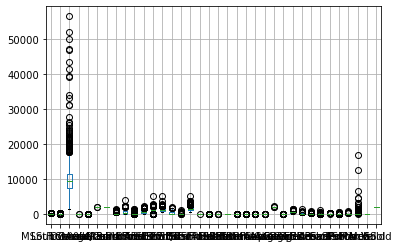

In [81]:
test_con.boxplot()

In [82]:
outlier =['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold']

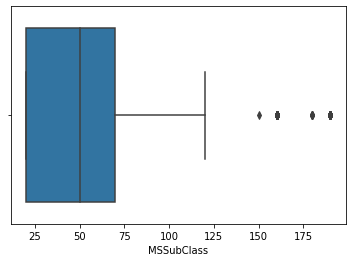

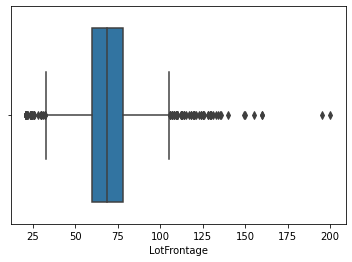

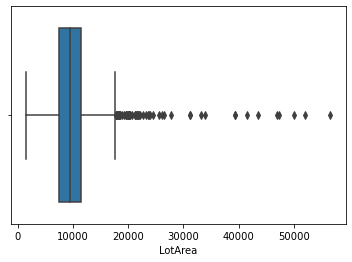

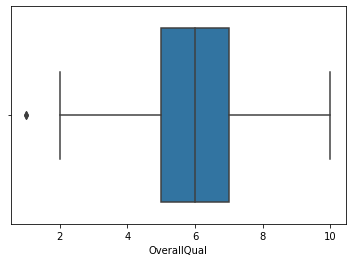

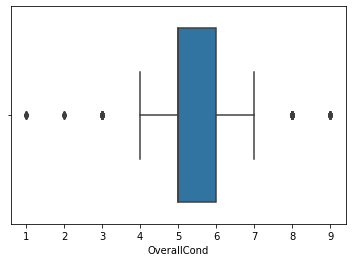

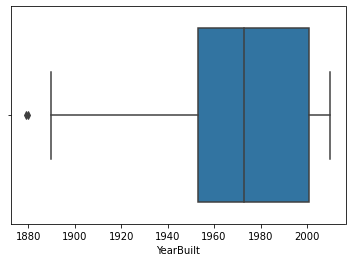

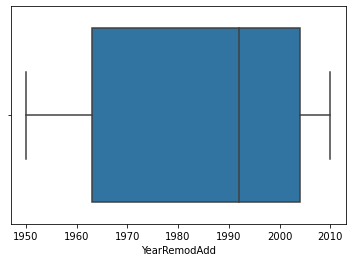

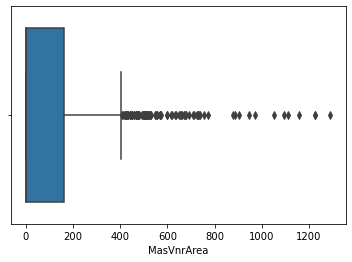

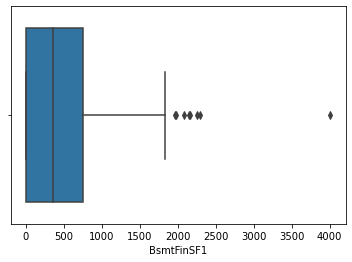

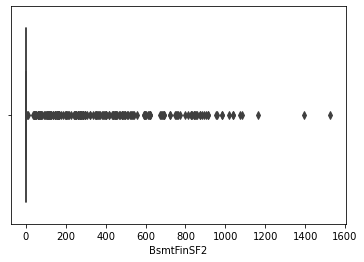

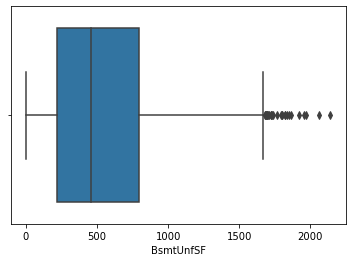

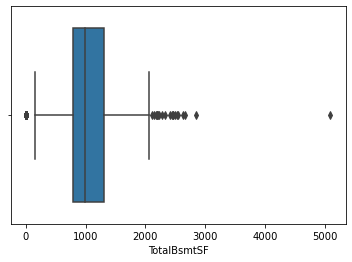

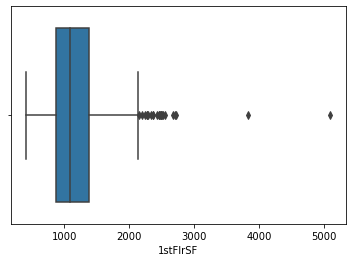

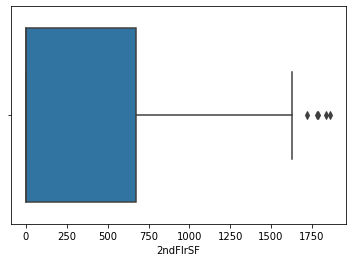

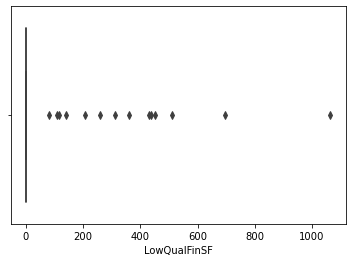

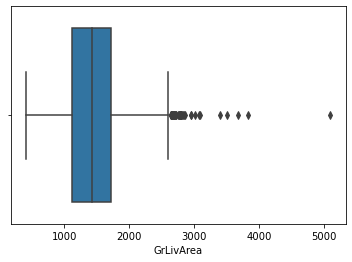

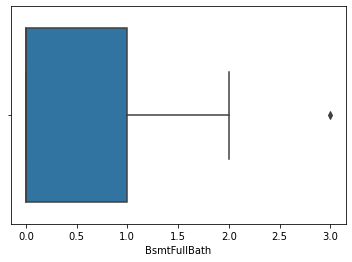

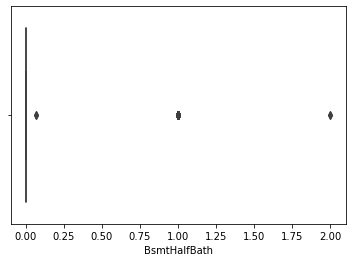

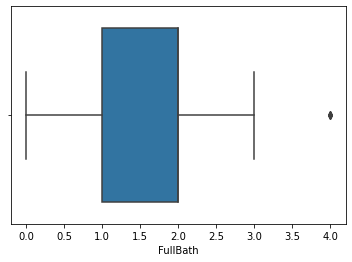

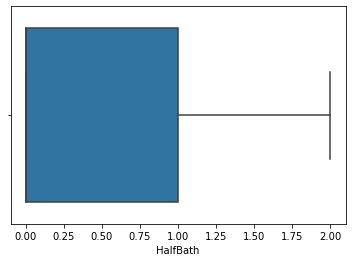

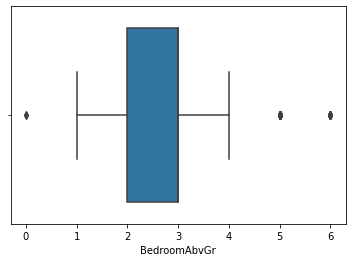

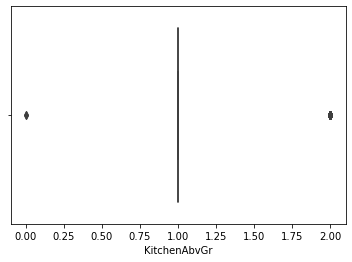

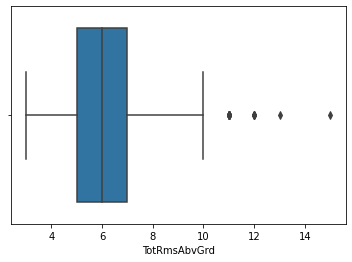

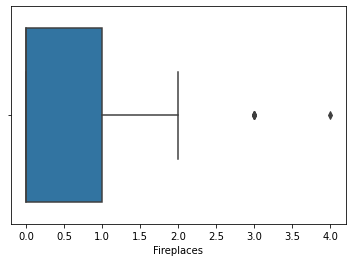

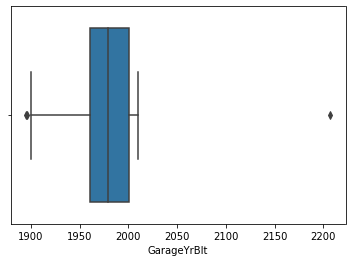

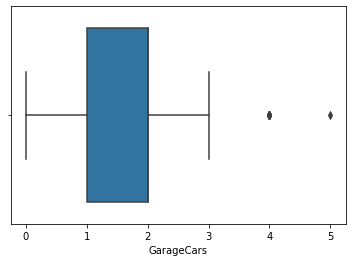

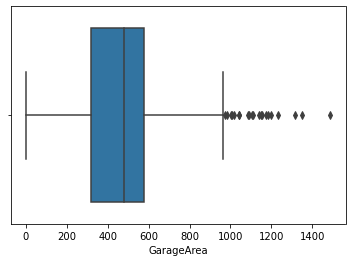

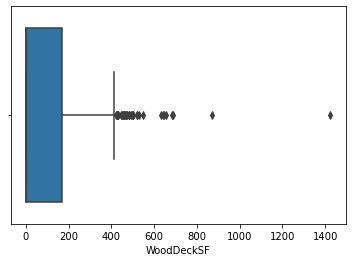

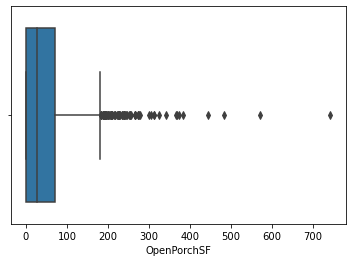

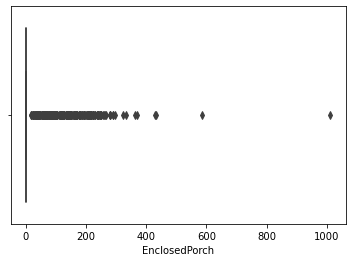

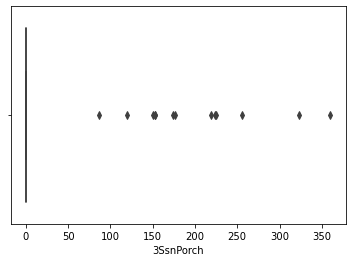

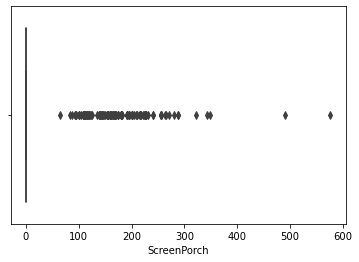

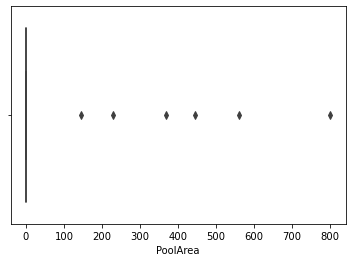

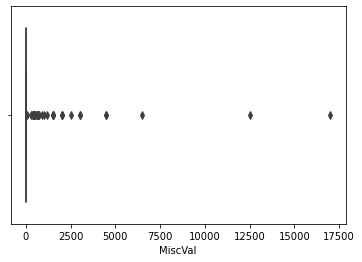

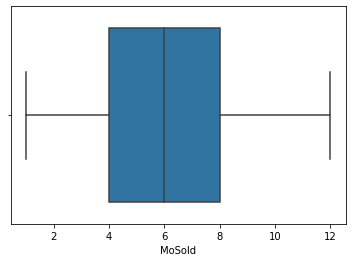

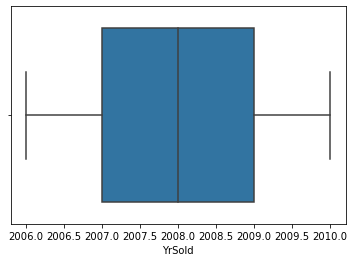

In [83]:
for i in outlier:
    sns.boxplot(test_con[i])
    plt.show() 

In [84]:
for i in test_con.columns:
    q1 = test_con[i].quantile(0.25)
    q3 = test_con[i].quantile(0.75)
    IQR = q3 - q1
    uppertail = q3 + 1.5*IQR
    lowertail = q1 - 1.5*IQR   
    mean = test_con.loc[(test_con[i]<uppertail)|(test_con[i]>lowertail) ,i].mean()
    test_con.loc[(test_con[i]>uppertail)|(test_con[i]<lowertail) ,i] = mean

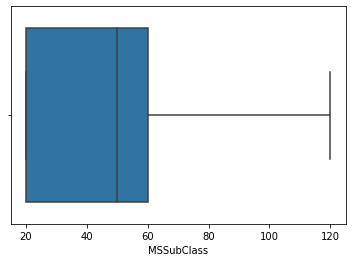

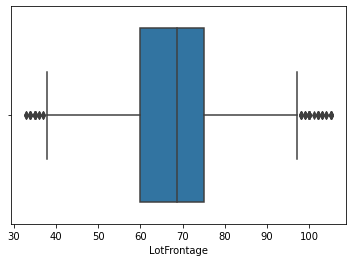

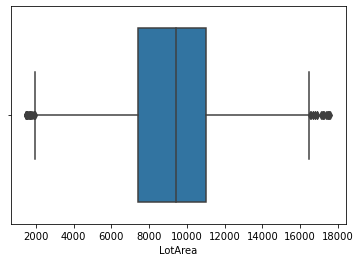

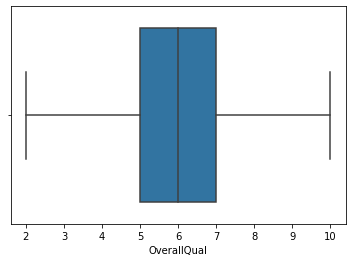

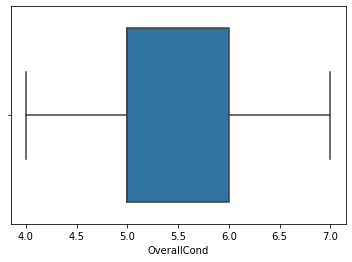

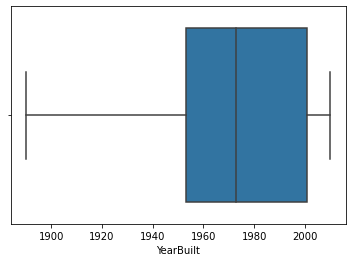

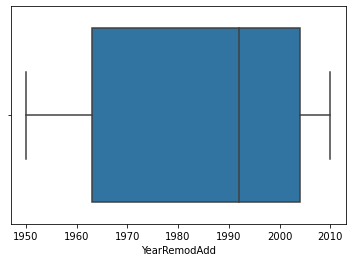

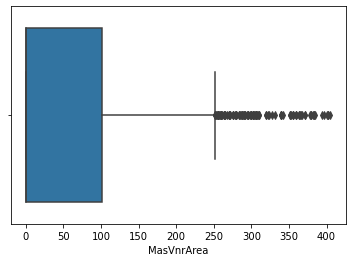

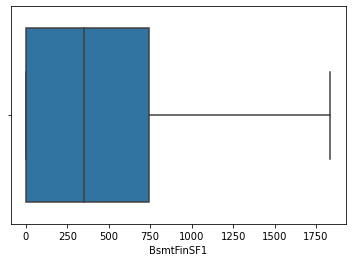

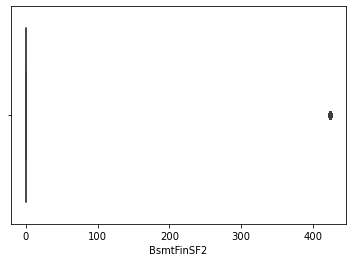

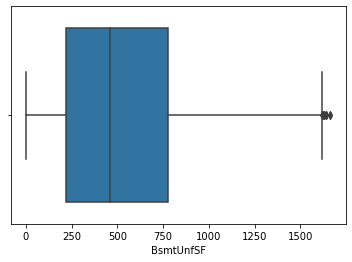

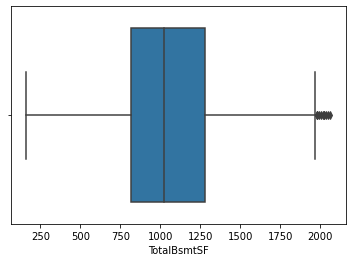

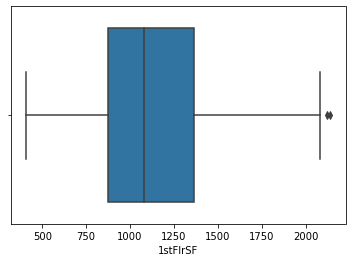

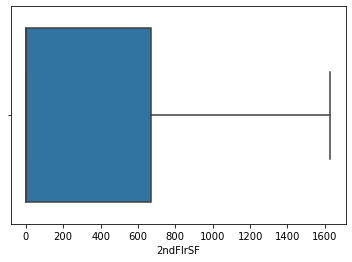

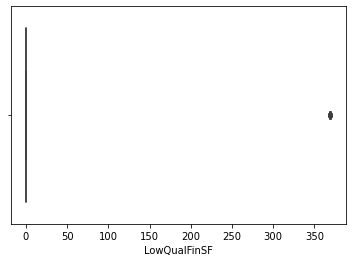

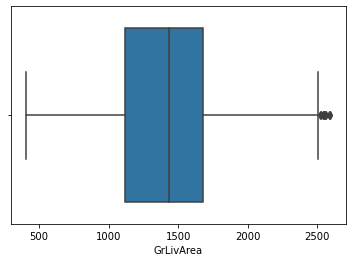

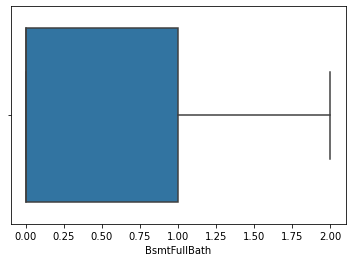

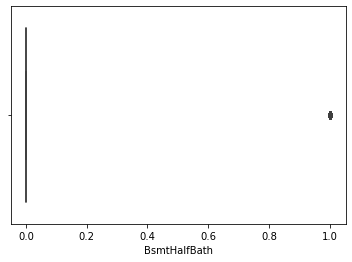

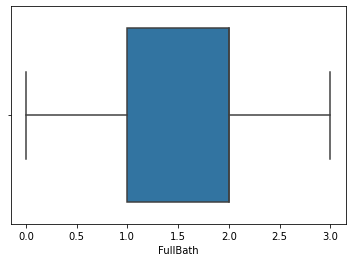

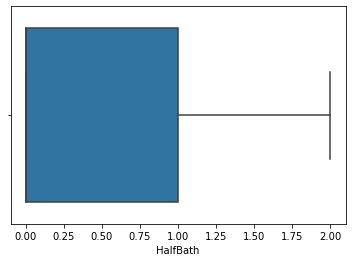

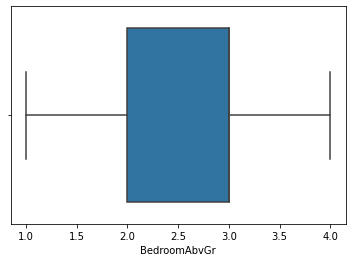

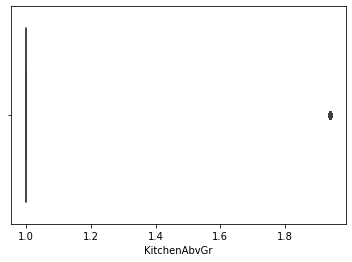

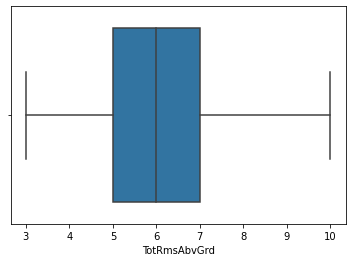

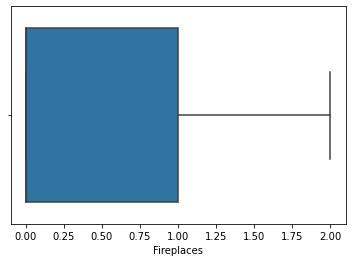

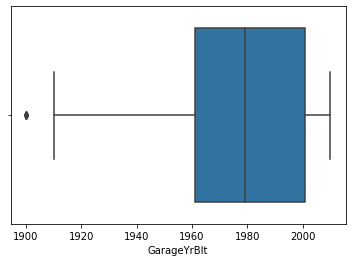

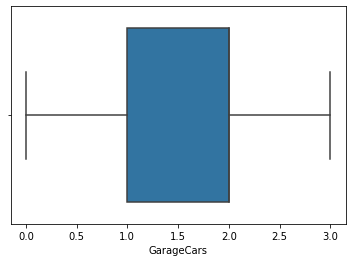

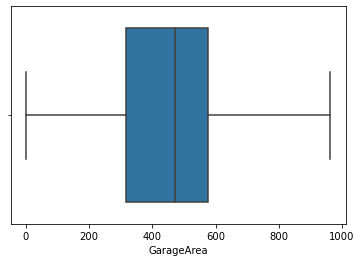

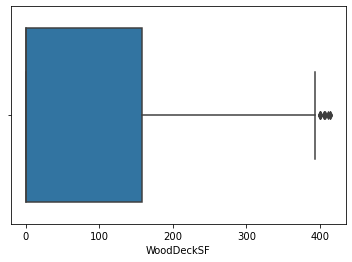

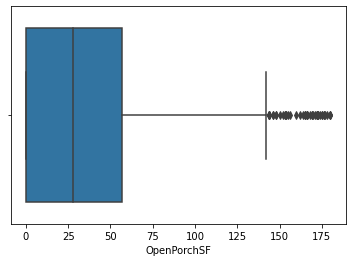

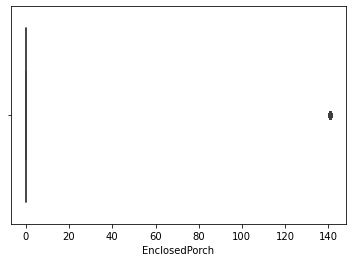

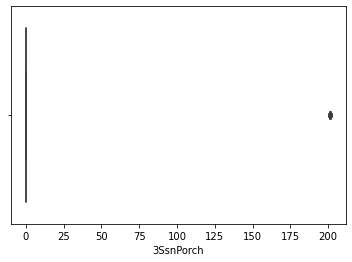

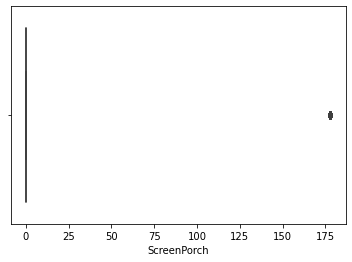

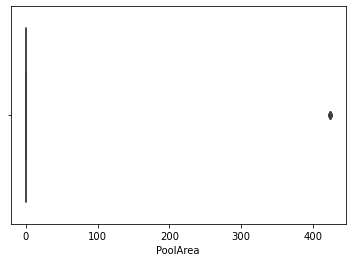

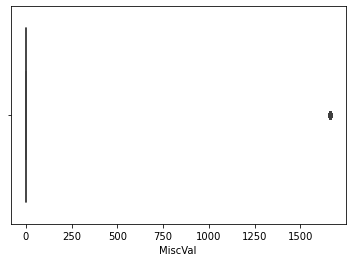

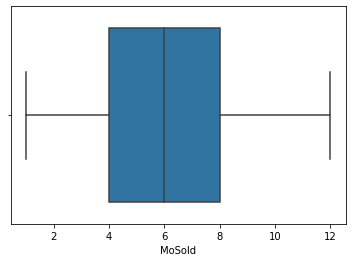

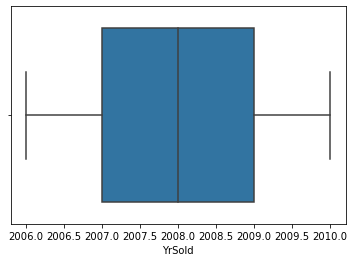

In [85]:
for i in outlier:
    sns.boxplot(test_con[i])
    plt.show() 

In [86]:
ss = StandardScaler()
X1 = ss.fit_transform(test_con)
X1

array([[-1.01193198,  0.90614535,  0.76221975, ..., -0.19031971,
        -0.03828073,  1.71390537],
       [-1.01193198,  0.98311962,  1.58769485, ...,  5.25431662,
        -0.03828073,  1.71390537],
       [ 0.36781361,  0.44429973,  1.45131201, ..., -0.19031971,
        -1.1406145 ,  1.71390537],
       ...,
       [-1.01193198,  0.02712668,  0.19957375, ..., -0.19031971,
         1.06405305, -1.35995811],
       [ 1.23015461, -0.4793915 ,  0.39364277, ...,  5.25431662,
         0.32916387, -1.35995811],
       [ 0.36781361,  0.44429973,  0.13960242, ..., -0.19031971,
         1.79894223, -1.35995811]])

In [87]:
df1 = pd.DataFrame(X1,columns=test_con.columns)
df1

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,-1.011932,0.906145,0.762220,-0.762520,0.730243,-0.347276,-1.072885,-0.662937,0.091576,2.657212,-0.650216,-0.480772,-0.689564,-0.779871,-0.098431,-1.333813,-0.822887,-0.263909,-1.044597,-0.751040,-1.123041,-0.217669,-0.957211,-0.914962,-0.674923,-1.001785,1.327103,0.559470,-0.848078,-0.455831,-0.094817,3.069435,-0.06426,-0.190320,-0.038281,1.713905
1,-1.011932,0.983120,1.587695,-0.060244,0.730243,-0.446651,-1.214908,0.430941,1.151026,-0.376334,-0.312776,0.759354,0.566385,-0.779871,-0.098431,-0.279165,-0.822887,-0.263909,-1.044597,1.237648,0.302100,-0.217669,-0.227203,-0.914962,-0.795839,-1.001785,-0.752364,3.017785,-0.028641,-0.455831,-0.094817,-0.325793,-0.06426,5.254317,-0.038281,1.713905
2,0.367814,0.444300,1.451312,-0.762520,-0.629294,0.845235,0.678742,-0.662937,0.843669,-0.376334,-0.980212,-0.353153,-0.596746,0.923602,-0.098431,0.451539,-0.822887,-0.263909,0.806608,1.237648,0.302100,-0.217669,-0.227203,0.693254,0.776066,0.339186,0.093352,1.259069,-0.074165,-0.455831,-0.094817,-0.325793,-0.06426,-0.190320,-1.140614,1.713905
3,0.367814,0.752197,0.249146,-0.060244,0.730243,0.878360,0.678742,-0.460367,0.403590,-0.376334,-0.516232,-0.358701,-0.602547,0.867711,-0.098431,0.390647,-0.822887,-0.263909,0.806608,1.237648,0.302100,-0.217669,0.502805,0.693254,0.816372,0.339186,0.033654,2.697135,-0.028641,-0.455831,-0.094817,-0.325793,-0.06426,-0.190320,-0.038281,1.713905
4,2.437432,-1.941903,-1.302872,1.344310,-0.629294,0.679608,0.394694,-0.662937,-0.385758,-0.376334,1.203222,0.623412,0.424257,-0.779871,-0.098431,-0.398513,-0.822887,-0.263909,0.806608,-0.751040,-1.123041,-0.217669,-0.957211,-0.914962,0.574540,0.339186,0.212747,-0.800863,1.018418,-0.455831,-0.094817,3.069435,-0.06426,-0.190320,-1.875504,1.713905
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,0.277383,0.027127,-2.260673,-1.464797,2.089780,-0.049148,-0.646813,-0.662937,-0.998143,-0.376334,0.034589,-1.412947,-1.704766,0.546942,-0.098431,-0.856421,-0.822887,-0.263909,-1.044597,1.237648,0.302100,-0.217669,-0.957211,-0.914962,0.050572,-2.342755,-2.304502,-0.800863,-0.848078,-0.455831,-0.094817,-0.325793,-0.06426,-0.190320,-0.038281,-1.359958
1455,0.277383,0.027127,-2.273781,-1.464797,-0.629294,-0.049148,-0.646813,-0.662937,-0.411371,-0.376334,-0.590668,-1.412947,-1.704766,0.546942,-0.098431,-0.856421,-0.822887,-0.263909,-1.044597,1.237648,0.302100,-0.217669,-0.227203,-0.914962,-0.312176,-1.001785,-0.881709,-0.800863,-0.301786,-0.455831,-0.094817,-0.325793,-0.06426,-0.190320,-0.773170,-1.359958
1456,-1.011932,0.027127,0.199574,-0.762520,2.089780,-0.380401,0.584059,-0.662937,1.851892,-0.376334,-1.320133,0.468049,0.261825,-0.779871,-0.098431,-0.534911,1.078881,-0.263909,-1.044597,-0.751040,1.727241,-0.217669,0.502805,0.693254,-0.715228,0.339186,0.560983,0.104485,-0.848078,-0.455831,-0.094817,-0.325793,-0.06426,-0.190320,1.064053,-1.359958
1457,1.230155,-0.479391,0.393643,-0.762520,-0.629294,0.679608,0.394694,-0.662937,-0.213452,-0.376334,0.106543,-0.397542,-0.474922,-0.779871,-0.098431,-1.153573,-0.822887,3.789181,-1.044597,-0.751040,0.302100,-0.217669,-0.227203,-0.914962,0.050572,-2.342755,-2.304502,-0.023530,-0.119689,-0.455831,-0.094817,-0.325793,-0.06426,5.254317,0.329164,-1.359958


### OHE of categorical columns

In [88]:
test_cat = pd.get_dummies(test_cat)
test_cat

,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,Alley_Grvl,Alley_No alley access,Alley_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_AllPub,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,...,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No Garage,GarageFinish_Fin,GarageFinish_No Garage,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_No Garage,GarageQual_Po,GarageQual_TA,GarageCond_Ex,GarageCond_Fa,GarageCond_Gd,GarageCond_No Garage,GarageCond_Po,GarageCond_TA,PavedDrive_N,PavedDrive_P,PavedDrive_Y,PoolQC_Ex,PoolQC_Gd,PoolQC_No Pool,Fence_GdPrv,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_No Fence,MiscFeature_Gar2,MiscFeature_None,MiscFeature_Othr,MiscFeature_Shed,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1,0,0,0,1,0,0,1,0,1,0,1,0,0,0,0,0,0,1,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
2,0,0,0,1,0,0,1,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
3,0,0,0,1,0,0,1,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
4,0,0,0,1,0,0,1,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,0,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1455,0,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0
1456,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0
1457,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0


In [89]:
final_df_test = pd.concat([test_cat,df1],axis=1)
final_df_test

,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,Alley_Grvl,Alley_No alley access,Alley_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_AllPub,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,...,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,1,0,-1.011932,0.906145,0.762220,-0.762520,0.730243,-0.347276,-1.072885,-0.662937,0.091576,2.657212,-0.650216,-0.480772,-0.689564,-0.779871,-0.098431,-1.333813,-0.822887,-0.263909,-1.044597,-0.751040,-1.123041,-0.217669,-0.957211,-0.914962,-0.674923,-1.001785,1.327103,0.559470,-0.848078,-0.455831,-0.094817,3.069435,-0.06426,-0.190320,-0.038281,1.713905
1,0,0,0,1,0,0,1,0,1,0,1,0,0,0,0,0,0,1,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,1,0,-1.011932,0.983120,1.587695,-0.060244,0.730243,-0.446651,-1.214908,0.430941,1.151026,-0.376334,-0.312776,0.759354,0.566385,-0.779871,-0.098431,-0.279165,-0.822887,-0.263909,-1.044597,1.237648,0.302100,-0.217669,-0.227203,-0.914962,-0.795839,-1.001785,-0.752364,3.017785,-0.028641,-0.455831,-0.094817,-0.325793,-0.06426,5.254317,-0.038281,1.713905
2,0,0,0,1,0,0,1,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0.367814,0.444300,1.451312,-0.762520,-0.629294,0.845235,0.678742,-0.662937,0.843669,-0.376334,-0.980212,-0.353153,-0.596746,0.923602,-0.098431,0.451539,-0.822887,-0.263909,0.806608,1.237648,0.302100,-0.217669,-0.227203,0.693254,0.776066,0.339186,0.093352,1.259069,-0.074165,-0.455831,-0.094817,-0.325793,-0.06426,-0.190320,-1.140614,1.713905
3,0,0,0,1,0,0,1,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0.367814,0.752197,0.249146,-0.060244,0.730243,0.878360,0.678742,-0.460367,0.403590,-0.376334,-0.516232,-0.358701,-0.602547,0.867711,-0.098431,0.390647,-0.822887,-0.263909,0.806608,1.237648,0.302100,-0.217669,0.502805,0.693254,0.816372,0.339186,0.033654,2.697135,-0.028641,-0.455831,-0.094817,-0.325793,-0.06426,-0.190320,-0.038281,1.713905
4,0,0,0,1,0,0,1,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0,0,0,1,0,2.437432,-1.941903,-1.302872,1.344310,-0.629294,0.679608,0.394694,-0.662937,-0.385758,-0.376334,1.203222,0.623412,0.424257,-0.779871,-0.098431,-0.398513,-0.822887,-0.263909,0.806608,-0.751040,-1.123041,-0.217669,-0.957211,-0.914962,0.574540,0.339186,0.212747,-0.800863,1.018418,-0.455831,-0.094817,3.069435,-0.06426,-0.190320,-1.875504,1.713905
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,

In [90]:
x.columns

Index(['Alley_Grvl', 'LotShape_IR2', 'LandContour_Bnk', 'LotConfig_CulDSac',
       'LandSlope_Gtl', 'Neighborhood_BrDale', 'Neighborhood_BrkSide',
       'Neighborhood_ClearCr', 'Neighborhood_CollgCr', 'Neighborhood_Crawfor',
       'Neighborhood_Gilbert', 'Neighborhood_IDOTRR', 'Neighborhood_MeadowV',
       'Neighborhood_NWAmes', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt',
       'Neighborhood_SWISU', 'Neighborhood_StoneBr', 'Neighborhood_Veenker',
       'Condition1_Norm', 'Condition2_Feedr', 'BldgType_2fmCon',
       'BldgType_Duplex', 'BldgType_Twnhs', 'HouseStyle_1.5Unf',
       'Exterior1st_BrkComm', 'Exterior1st_HdBoard', 'Exterior1st_Wd Sdng',
       'Exterior1st_WdShing', 'Exterior2nd_Brk Cmn', 'Exterior2nd_Wd Sdng',
       'Exterior2nd_Wd Shng', 'BsmtFinType2_Unf', 'Heating_Grav',
       'Heating_Wall', 'Functional_Typ', 'FireplaceQu_Ex', 'FireplaceQu_TA',
       'GarageType_BuiltIn', 'GarageType_CarPort', 'GarageQual_Po',
       'Fence_No Fence', 'SaleType_COD', 'SaleT

In [91]:
list_features = ['Alley_Grvl', 'LotShape_IR2', 'LandContour_Bnk', 'LotConfig_CulDSac','LandSlope_Gtl', 'Neighborhood_BrDale', 'Neighborhood_BrkSide','Neighborhood_ClearCr', 'Neighborhood_CollgCr', 'Neighborhood_Crawfor','Neighborhood_Gilbert', 'Neighborhood_IDOTRR', 'Neighborhood_MeadowV','Neighborhood_NWAmes', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt','Neighborhood_SWISU', 'Neighborhood_StoneBr', 'Neighborhood_Veenker','Condition1_Norm', 'Condition2_Feedr', 'BldgType_2fmCon','BldgType_Duplex', 'BldgType_Twnhs', 'HouseStyle_1.5Unf','Exterior1st_BrkComm', 'Exterior1st_HdBoard','Exterior1st_Wd Sdng', 'Exterior1st_WdShing', 'Exterior2nd_Brk Cmn','Exterior2nd_Wd Sdng', 'Exterior2nd_Wd Shng', 'BsmtFinType2_Unf','Heating_Grav', 'Heating_Wall', 'Functional_Typ', 'FireplaceQu_Ex','FireplaceQu_TA', 'GarageType_BuiltIn', 'GarageType_CarPort','GarageQual_Po', 'Fence_No Fence', 'SaleType_COD', 'SaleType_WD','MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond','BsmtFinSF1', '1stFlrSF', 'BsmtFullBath', 'FullBath', 'HalfBath','Fireplaces', 'GarageYrBlt', 'GarageCars', 'WoodDeckSF', 'OpenPorchSF','EnclosedPorch', 'MoSold']

In [92]:
final_df_test_1=final_df_test[list_features]
final_df_test_1

,Alley_Grvl,LotShape_IR2,LandContour_Bnk,LotConfig_CulDSac,LandSlope_Gtl,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_SWISU,Neighborhood_StoneBr,Neighborhood_Veenker,Condition1_Norm,Condition2_Feedr,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,HouseStyle_1.5Unf,Exterior1st_BrkComm,Exterior1st_HdBoard,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_Brk Cmn,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,BsmtFinType2_Unf,Heating_Grav,Heating_Wall,Functional_Typ,FireplaceQu_Ex,FireplaceQu_TA,GarageType_BuiltIn,GarageType_CarPort,GarageQual_Po,Fence_No Fence,SaleType_COD,SaleType_WD,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,BsmtFinSF1,1stFlrSF,BsmtFullBath,FullBath,HalfBath,Fireplaces,GarageYrBlt,GarageCars,WoodDeckSF,OpenPorchSF,EnclosedPorch,MoSold
0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,-1.011932,0.906145,0.762220,-0.762520,0.730243,0.091576,-0.689564,-0.822887,-1.044597,-0.751040,-0.914962,-0.674923,-1.001785,0.559470,-0.848078,-0.455831,-0.038281
1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,1,-1.011932,0.983120,1.587695,-0.060244,0.730243,1.151026,0.566385,-0.822887,-1.044597,1.237648,-0.914962,-0.795839,-1.001785,3.017785,-0.028641,-0.455831,-0.038281
2,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0.367814,0.444300,1.451312,-0.762520,-0.629294,0.843669,-0.596746,-0.822887,0.806608,1.237648,0.693254,0.776066,0.339186,1.259069,-0.074165,-0.455831,-1.140614
3,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0.367814,0.752197,0.249146,-0.060244,0.730243,0.403590,-0.602547,-0.822887,0.806608,1.237648,0.693254,0.816372,0.339186,2.697135,-0.028641,-0.455831,-0.038281
4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,2.437432,-1.941903,-1.302872,1.344310,-0.629294,-0.385758,0.424257,-0.822887,0.806608,-0.751040,-0.914962,0.574540,0.339186,-0.800863,1.018418,-0.455831,-1.875504
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0.277383,0.027127,-2.260673,-1.464797,2.089780,-0.998143,-1.704766,-0.822887,-1.044597,1.237648,-0.914962,0.050572,-2.342755,-0.800863,-0.848078,-0.455831,-0.038281
1455,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1,0.277383,0.027127,-2.273781,-1.464797,-0.629294,-0.411371,-1.704766,-0.822887,-1.044597,1.237648,-0.914962,-0.312176,-1.001785,-0.800863,-0.301786,-0.455831,-0.773170
1456,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,1,-1.011932,0.027127,0.199574,-0.762520,2.089780,1.851892,0.261825,1.078881,-1.044597,-0.751040,0.693254,-0.715228,0.339186,0.104485,-0.848078,-0.455831,1.064053
1457,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,1,1.230155,-0.479391,0.393643,-0.762520,-0.629294,-0.213452,-0.474922,-0.822887,-1.044597,-0.751040,-0.914962,0.050572,-2.342755,-0.023530,-0.119689,-0.455831,0.329164


# Final Predictions

In [93]:
Predictions = lasso_model_out.predict(final_df_test_1)
Predictions

array([120168.68034904, 184423.7075941 , 177115.13694824, ...,
       169764.55830918,  74937.02667207, 222956.603715  ])

In [94]:
final_output = pd.DataFrame(Predictions,columns=['Final_Predictions'])
final_output

,Final_Predictions
0,120168.680349
1,184423.707594
2,177115.136948
3,196878.500425
4,225921.430284
...,...
1454,67910.714326
1455,69085.678668
1456,169764.558309
1457,74937.026672


In [95]:
A= pd.read_csv("testing_set.csv")
A

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,7,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,546.0,546.0,GasA,Gd,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,5,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,4,5,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,252.0,Unf,0.0,294.0,546.0,GasA,TA,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,6,Typ,0,NaN,CarPort,1970.0,Unf,1.0,286.0,TA,TA,Y,0,24,0,0,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,7,1960,1996,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,1224.0,Unf,0.0,0.0,1224.0,GasA,Ex,Y,SBrkr,1224,0,0,1224,1.0,0.0,1,0,4,1,TA,7,Typ,1,TA,Detchd,1960.0,Unf,2.0,576.0,TA,TA,Y,474,0,0,0,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,SFoyer,5,5,1992,1992,Gable,Comp

In [96]:
B = A[['Id']]
B

,Id
0,1461
1,1462
2,1463
3,1464
4,1465
...,...
1454,2915
1455,2916
1456,2917
1457,2918


In [97]:
pd.options.display.max_rows=1459

In [98]:
Housing_saleprices = pd.concat([B,final_output],axis=1)
Housing_saleprices

,Id,Final_Predictions
0,1461,120168.680349
1,1462,184423.707594
2,1463,177115.136948
3,1464,196878.500425
4,1465,225921.430284
5,1466,159459.789790
6,1467,187316.919165
7,1468,166884.712166
8,1469,201789.909348
9,1470,122884.058086


In [100]:
File_name = 'Final predictions.xlsx'
Final_submit = Housing_saleprices.to_excel(File_name)